In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Ex1.ExponentialFit import ExponentialFit, plot_expon, plot_hist, plot_time_series
from Ex3.USsupremeCourt import USsupremeCourt, plot_scatter, plot_heatmap, plot_line

## 1. Modeling the activity of a single neuron

### Q1

minimum tau value: 1.8999999999650754


<Figure size 1920x1440 with 0 Axes>

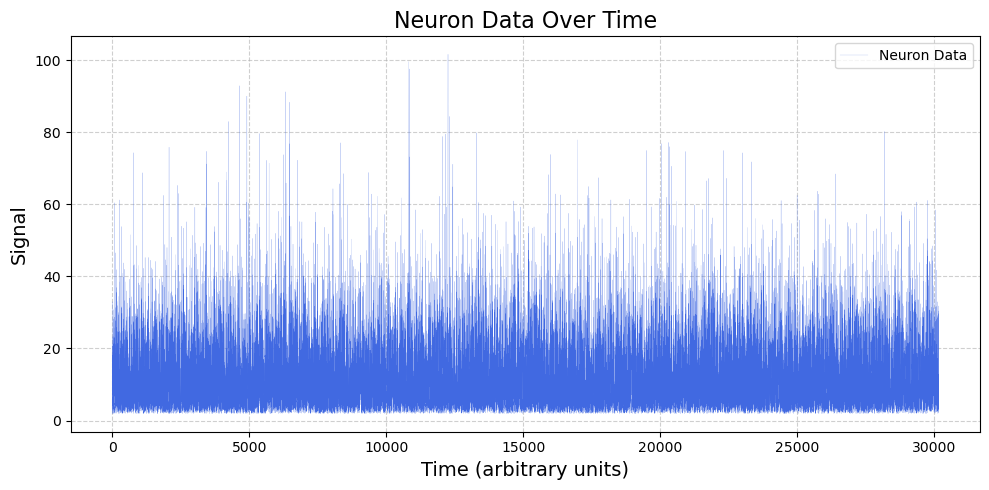

In [2]:
Q = ExponentialFit()
time_interval, min_tau = Q.load_data(file_path="data/Data_neuron.txt")
plot_time_series(time_interval)

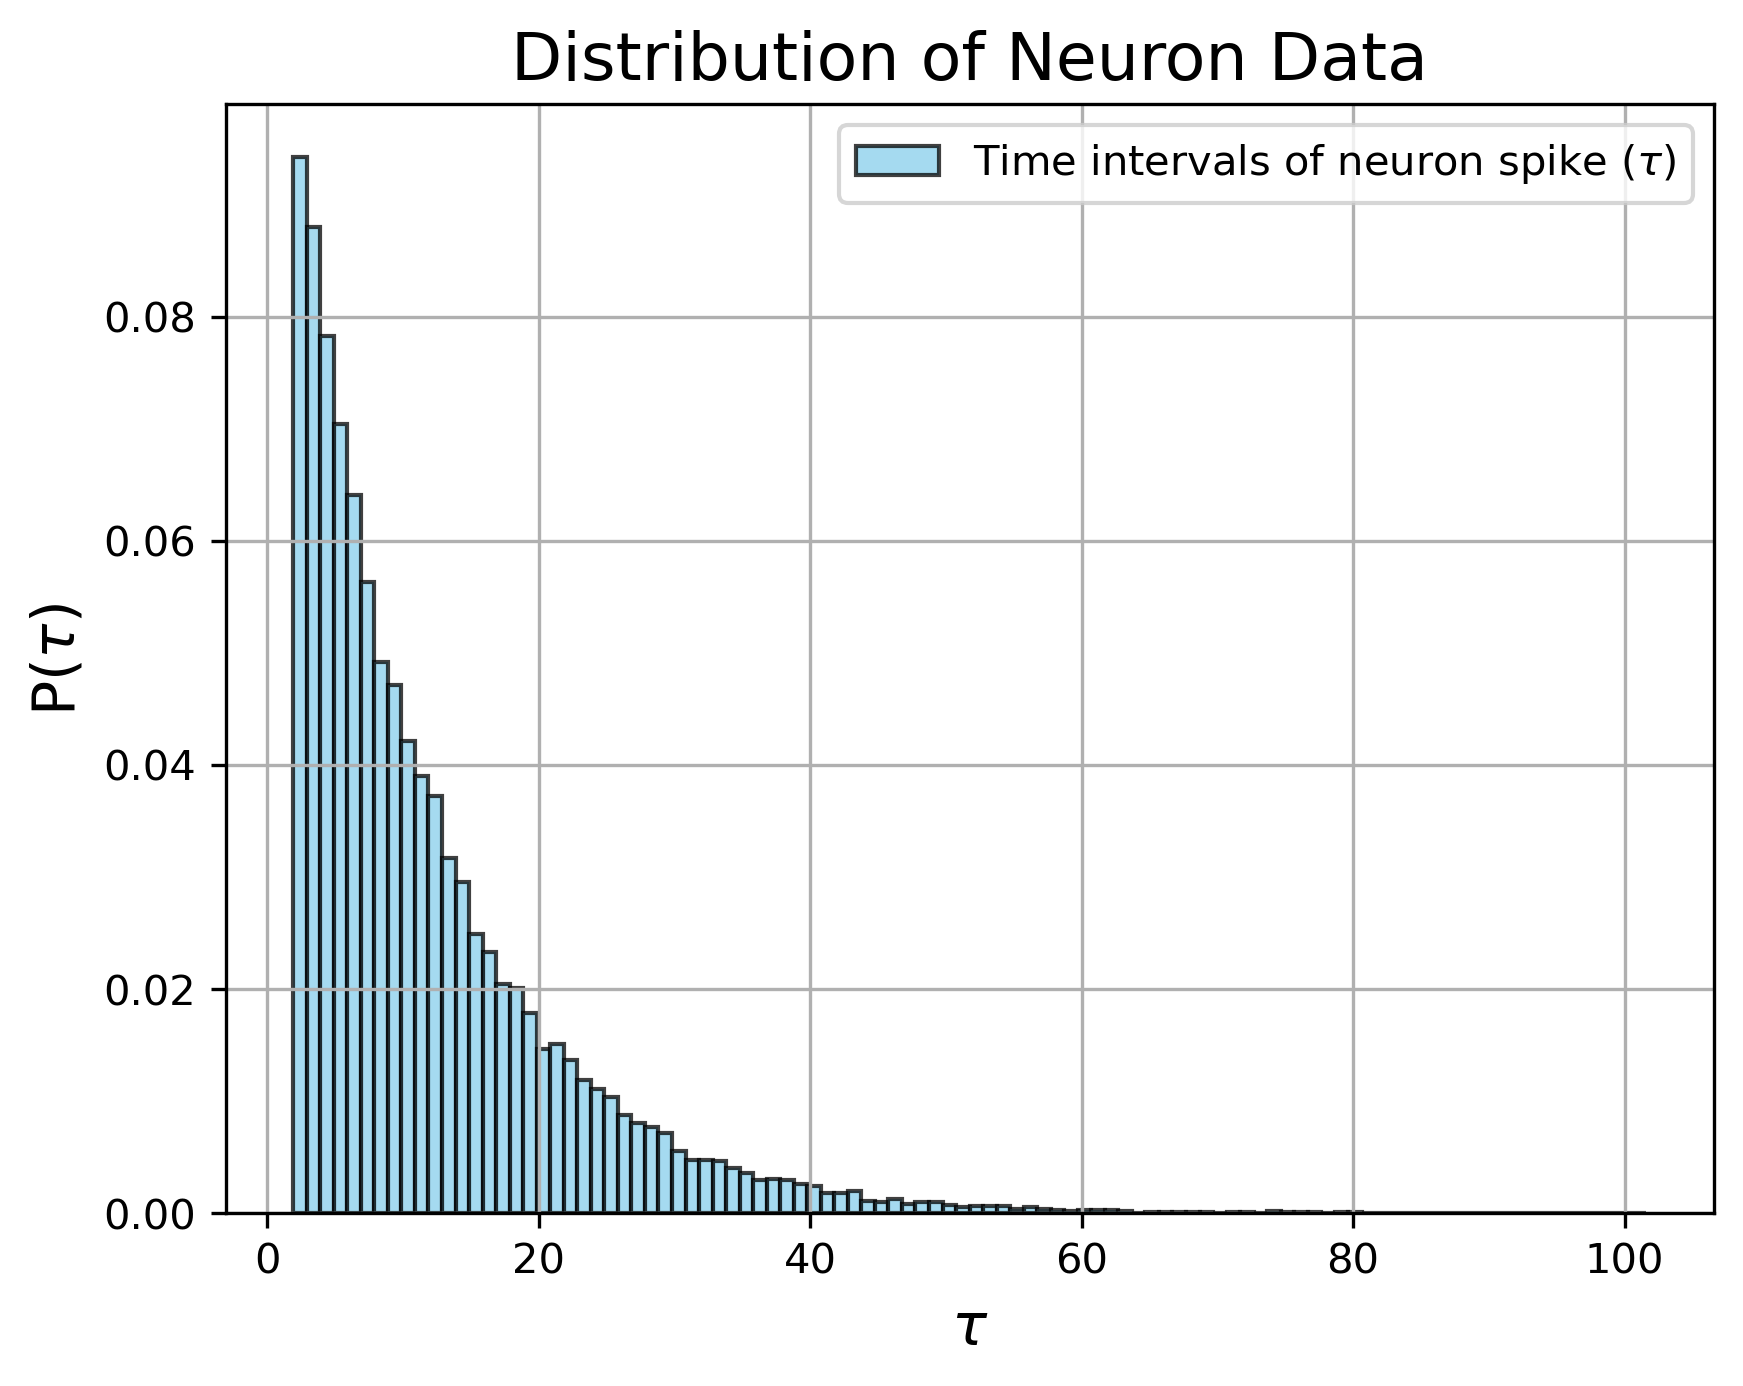

In [9]:
plt.figure(dpi=300)
plot_hist(time_interval, file_path="figure/Q1.png", title="Distribution of Neuron Data")

### Q2

In [4]:
loc, scale, lambda_hat = Q.fit_expon(time_interval)
Q.ks_test(time_interval, loc, scale)

Location: 1.8999999999650754
Scale: 10.033978583777133
Estimated lambda: 0.09966136479669123
KS Statistic: 0.004958276175485166, p-value: 0.4471240042902188


### Q3

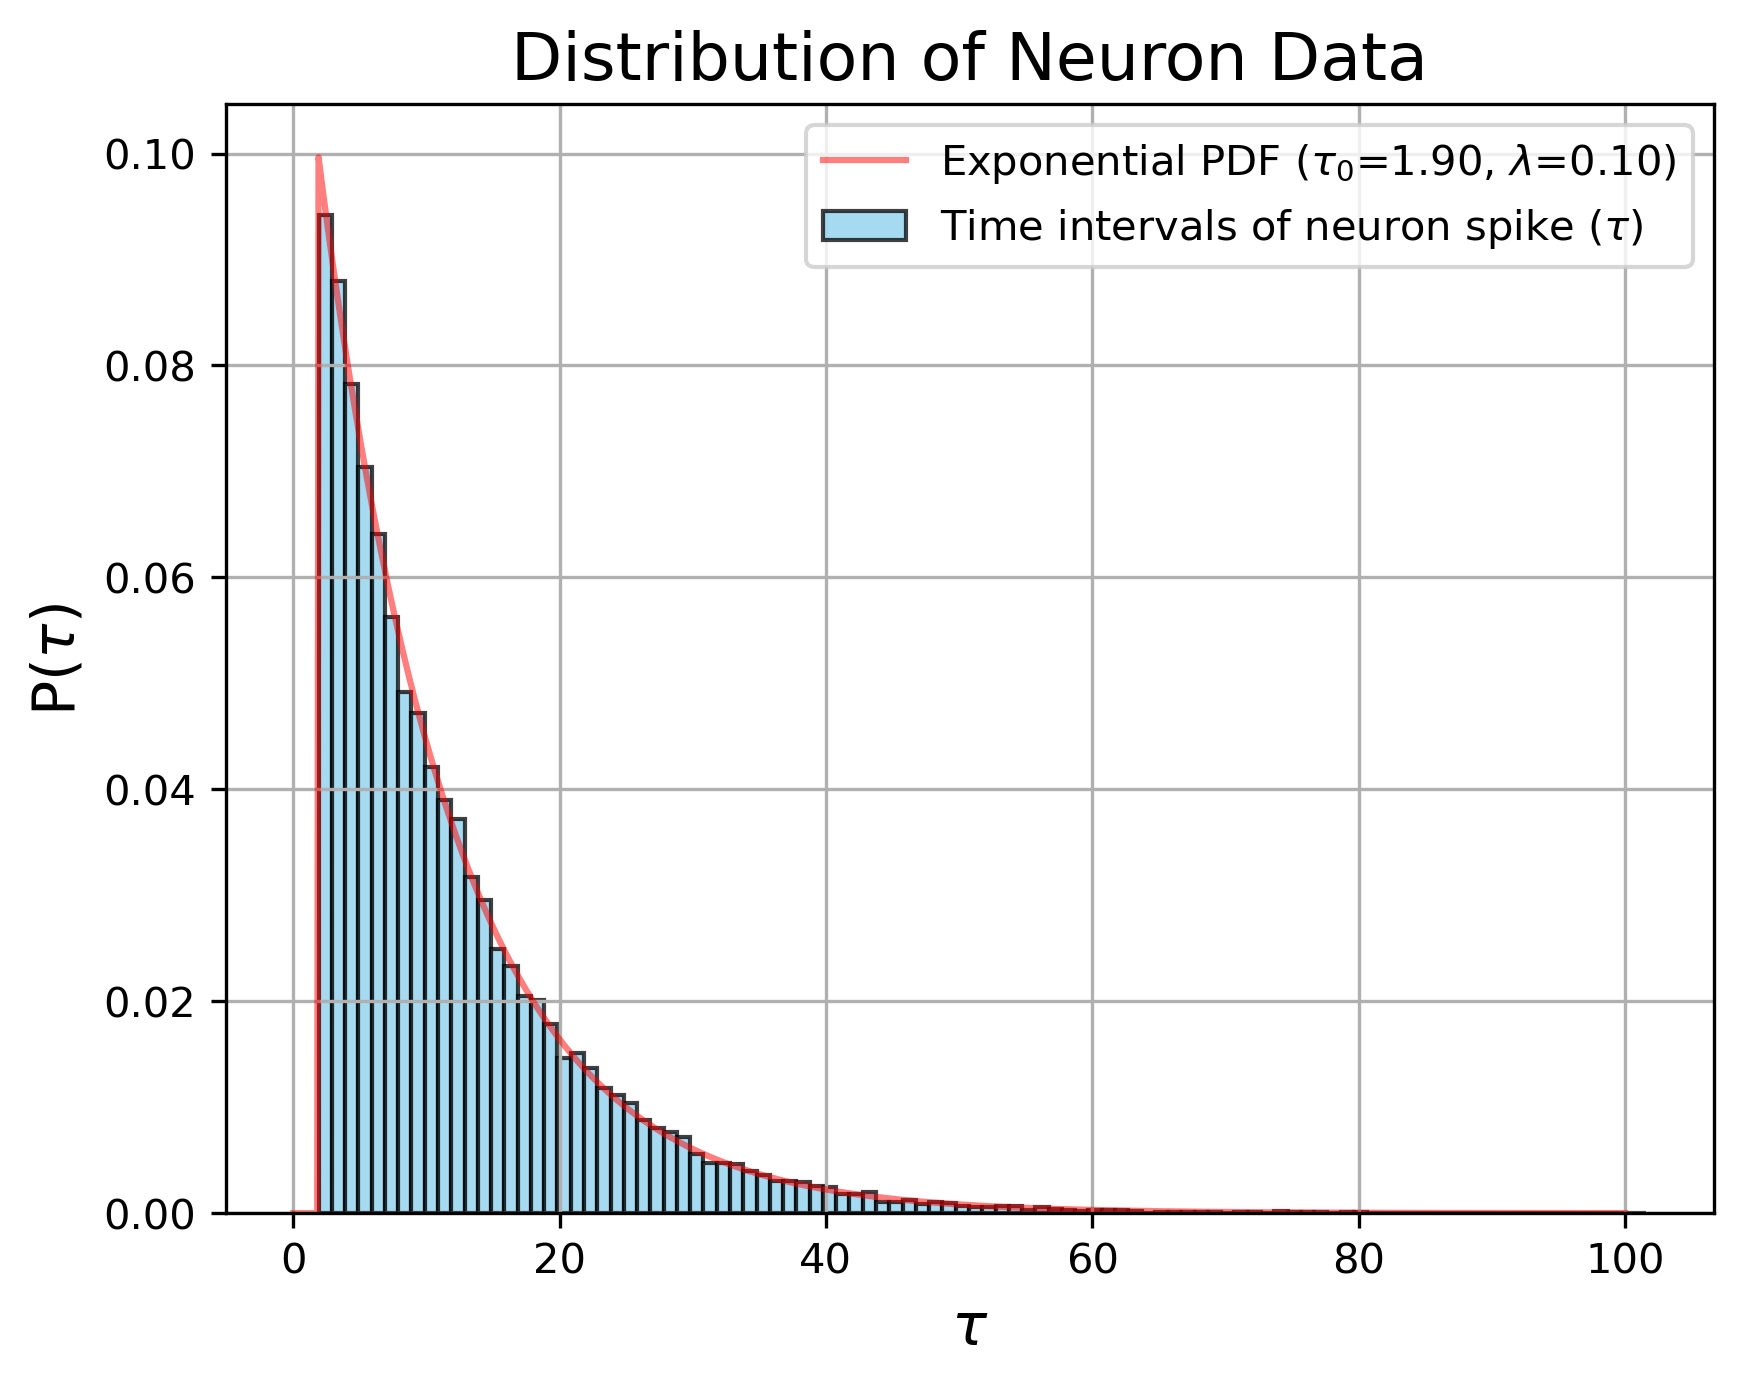

In [5]:
plt.figure(dpi=300)
plot_expon(loc, scale)
plot_hist(time_interval, file_path="figure/Q3.png", title="Distribution of Neuron Data")

### Q4

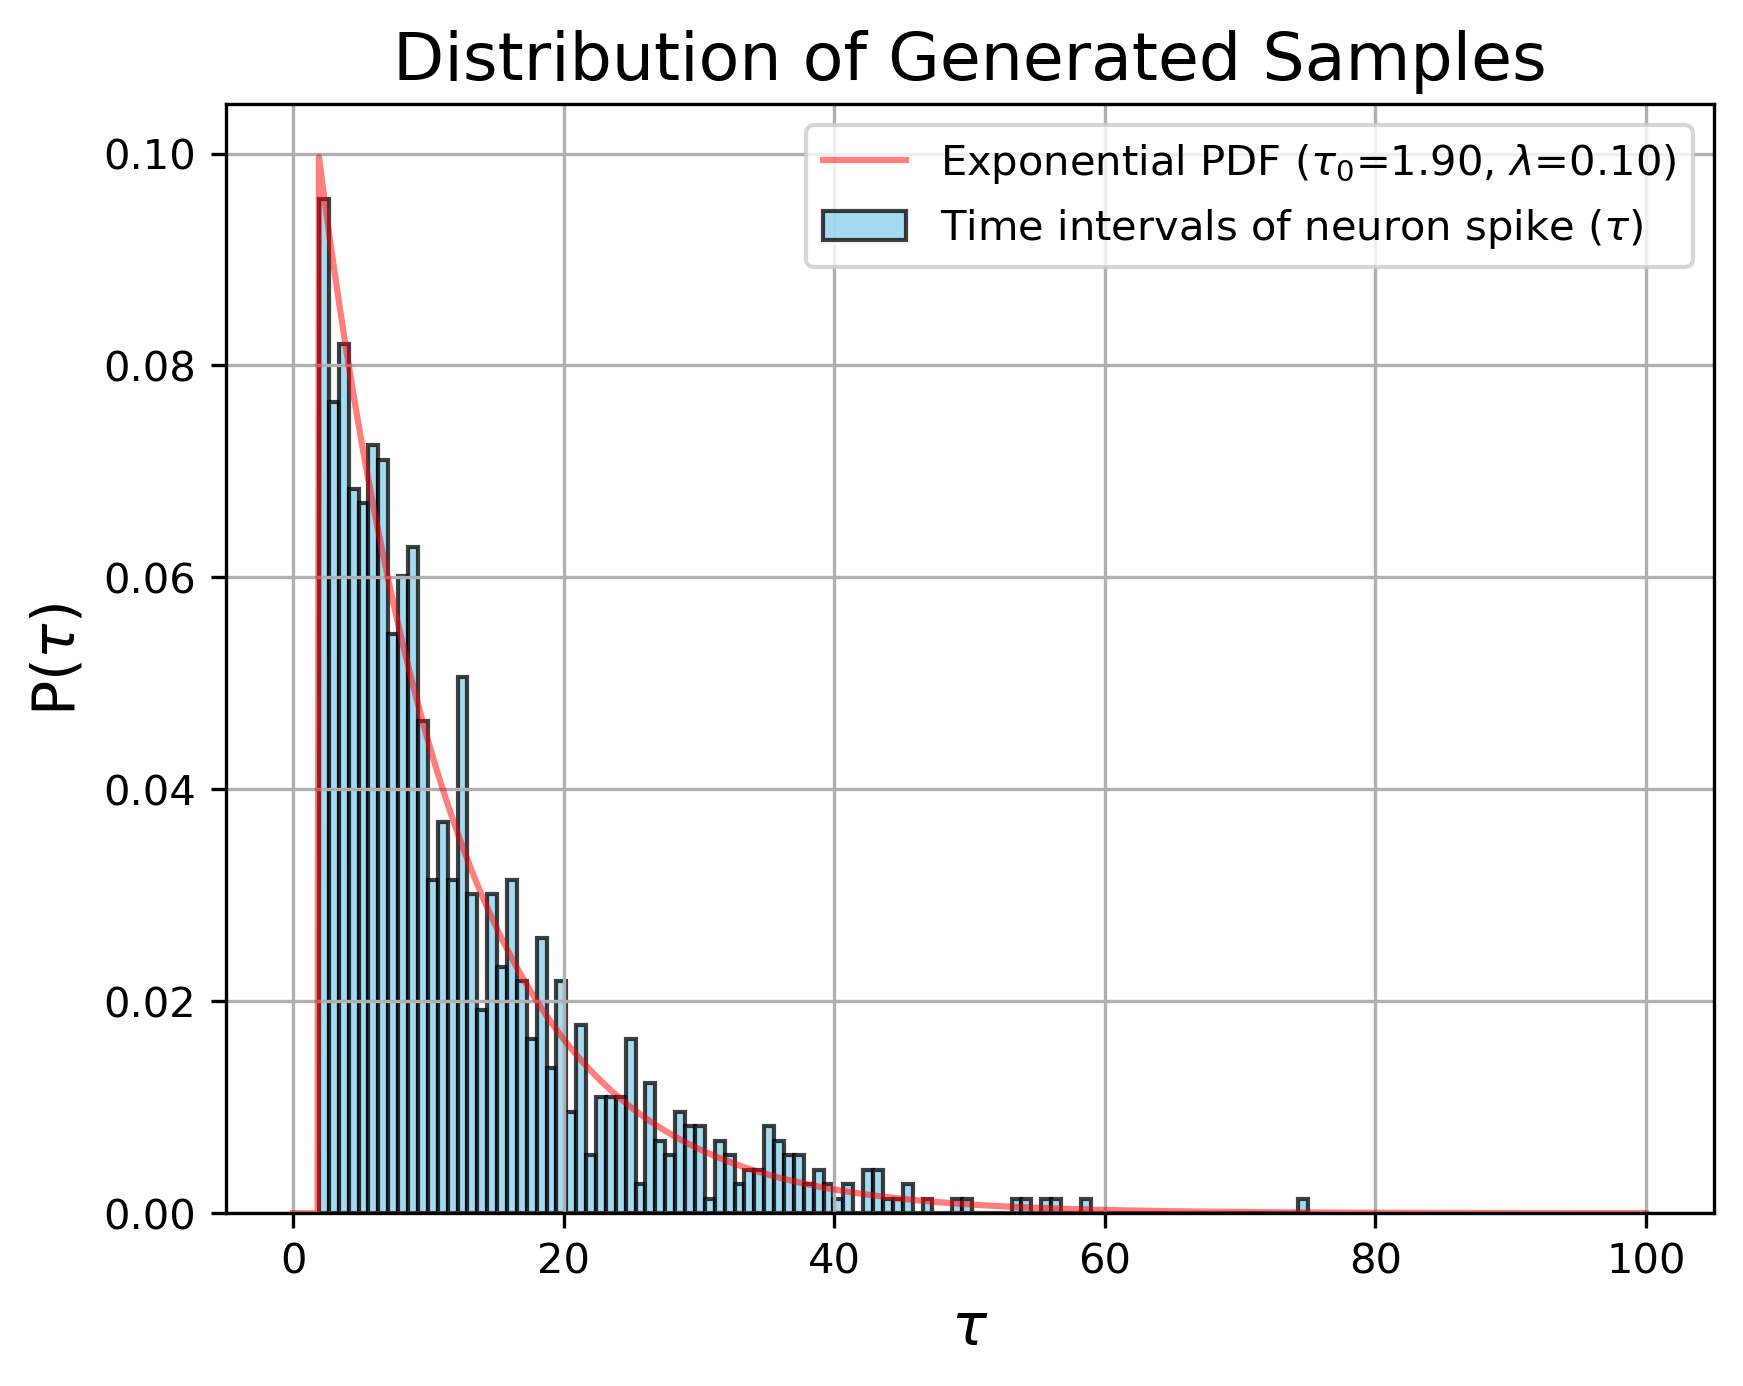

In [6]:
new_samples = Q.sample_expon(loc, scale, 1000)
plt.figure(dpi=300)
plot_expon(loc, scale)
plot_hist(new_samples, file_path="figure/Q4.png", title="Distribution of Generated Samples")

### Q5

In [7]:
Q.calculate_spiking_date(time_interval)
print("Mean inter-spike interval calculated by formula:", loc+1/lambda_hat)
print("Average spiking rate calculated by formula:", 1/(loc+1/lambda_hat))

Mean inter-spike interval <$\tau$> 11.933978583742208
Average spiking rate: 0.08379435181510307
Mean inter-spike interval calculated by formula: 11.933978583742208
Average spiking rate calculated by formula: 0.08379435181510307


## Q3: Application to the analysis of the US supreme Court

In [2]:
file_path_s = "data/US_SupremeCourt_n9_N895.txt"
file_path_h = "data/hi_ussc_unsorted.txt"
file_path_J = "data/Jij_ussc_unsorted.txt"

Q3 = USsupremeCourt()
Q3.clean_data(file_path_s, file_path_h, file_path_J)
n = Q3.n

### Q6.1

In [3]:
print("n", n)
print(fr"$2^n$", 2**n)
print("N", len(Q3.US_data))
print("N_max", len(set(Q3.US_data)))

n 9
$2^n$ 512
N 895
N_max 128


### Q6.3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


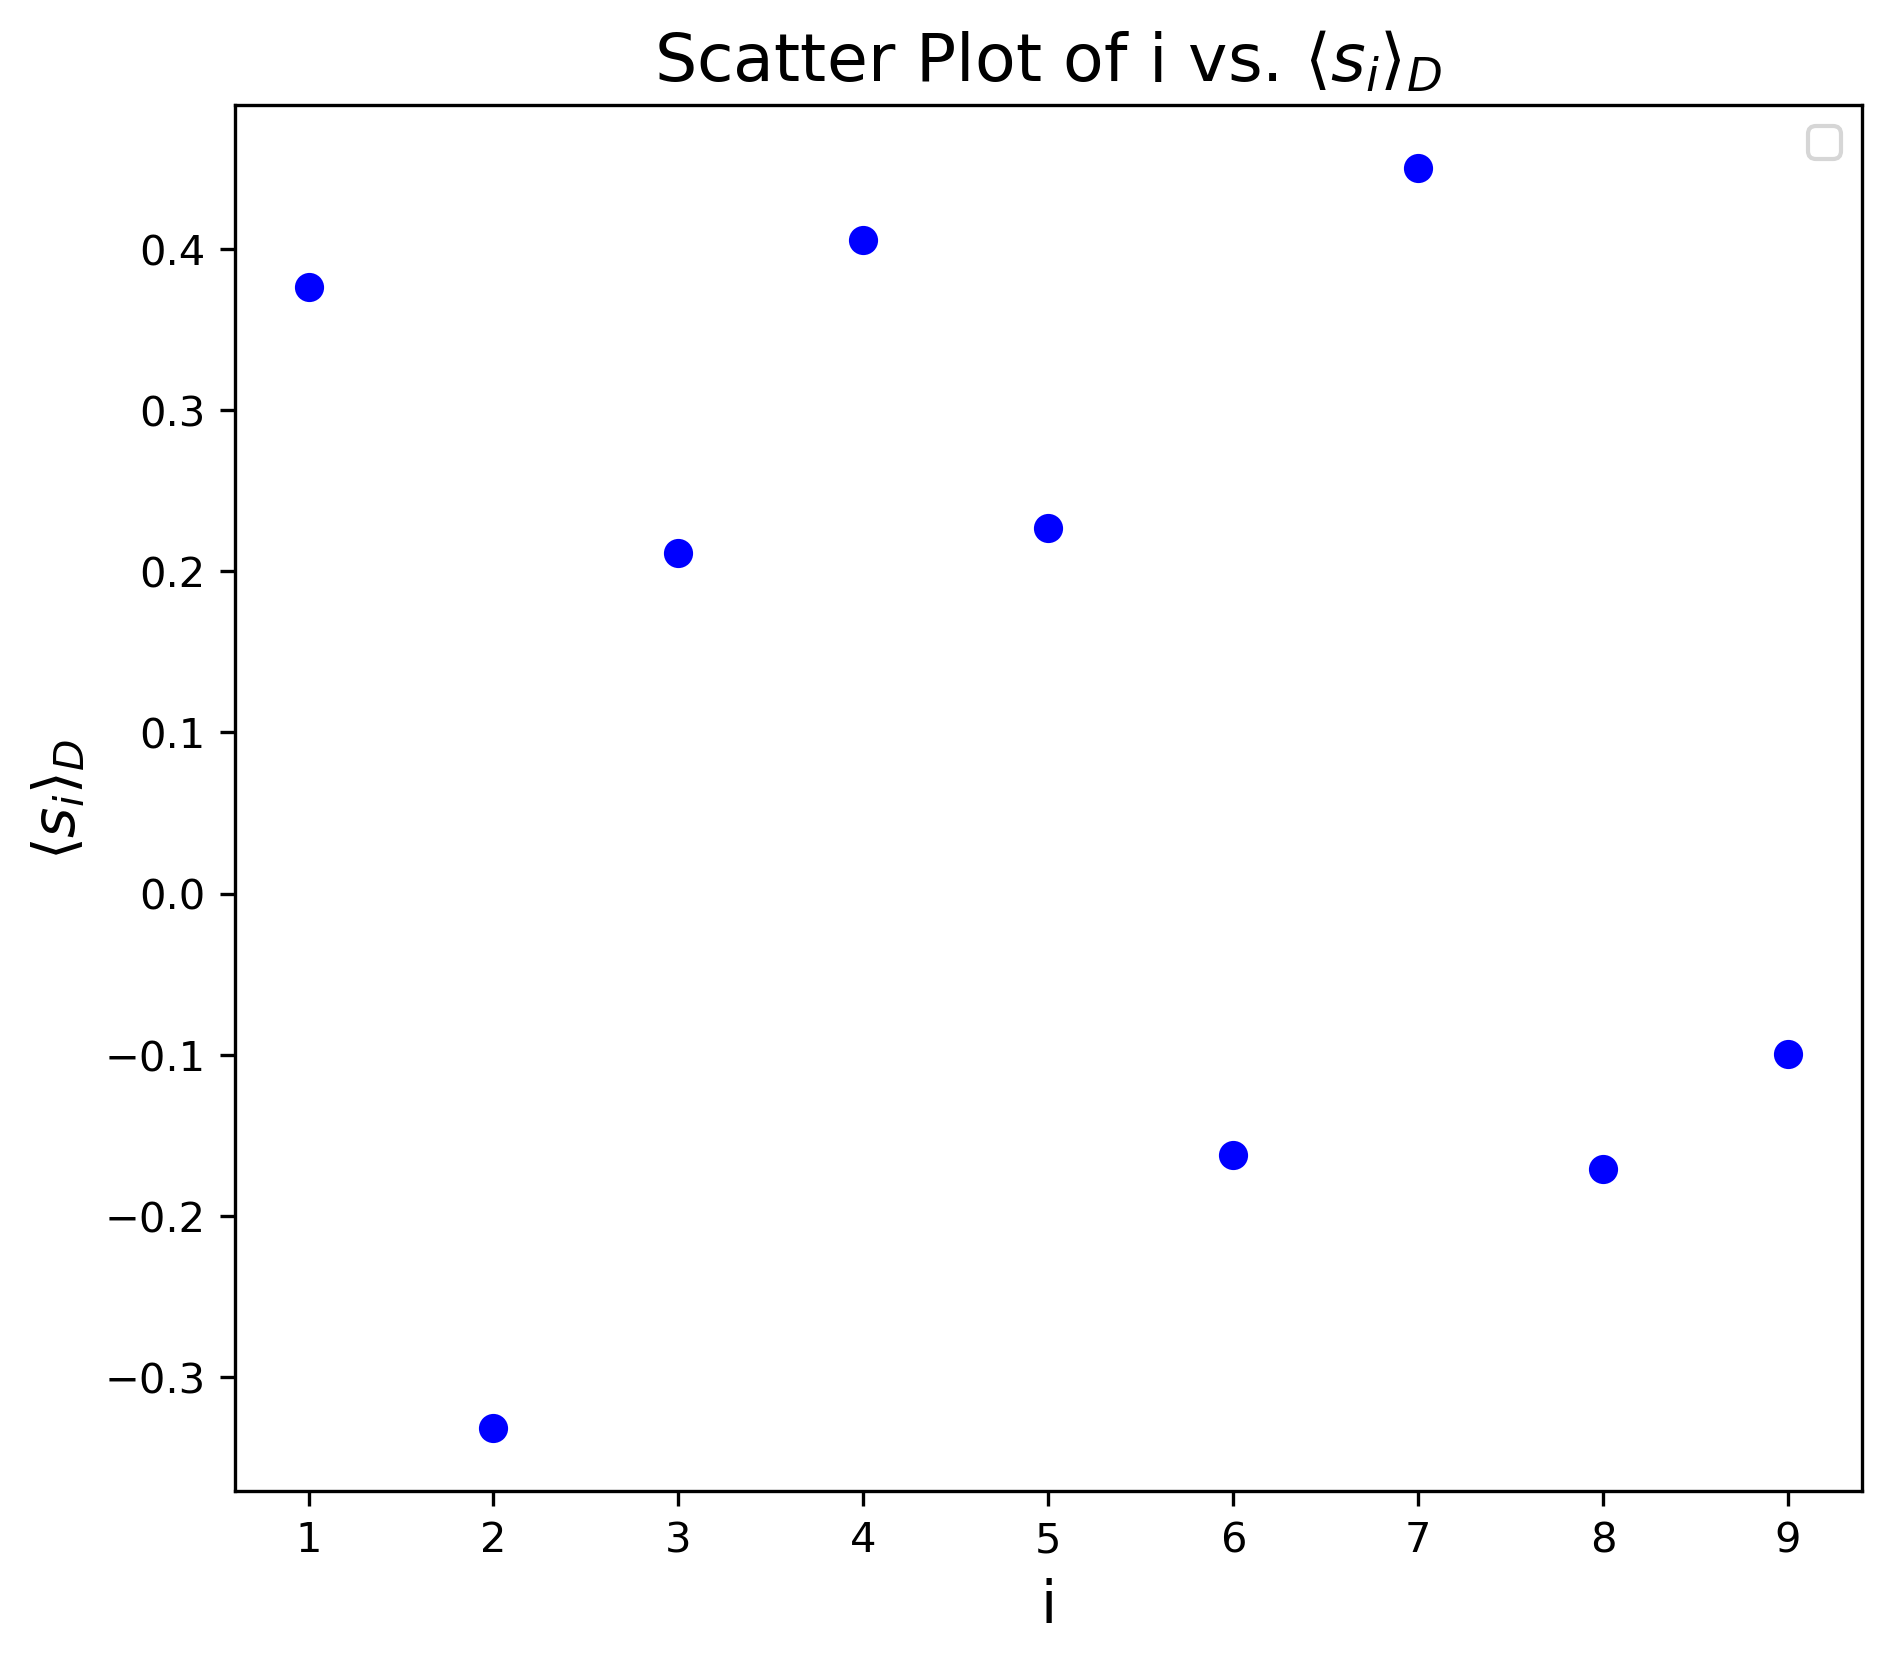

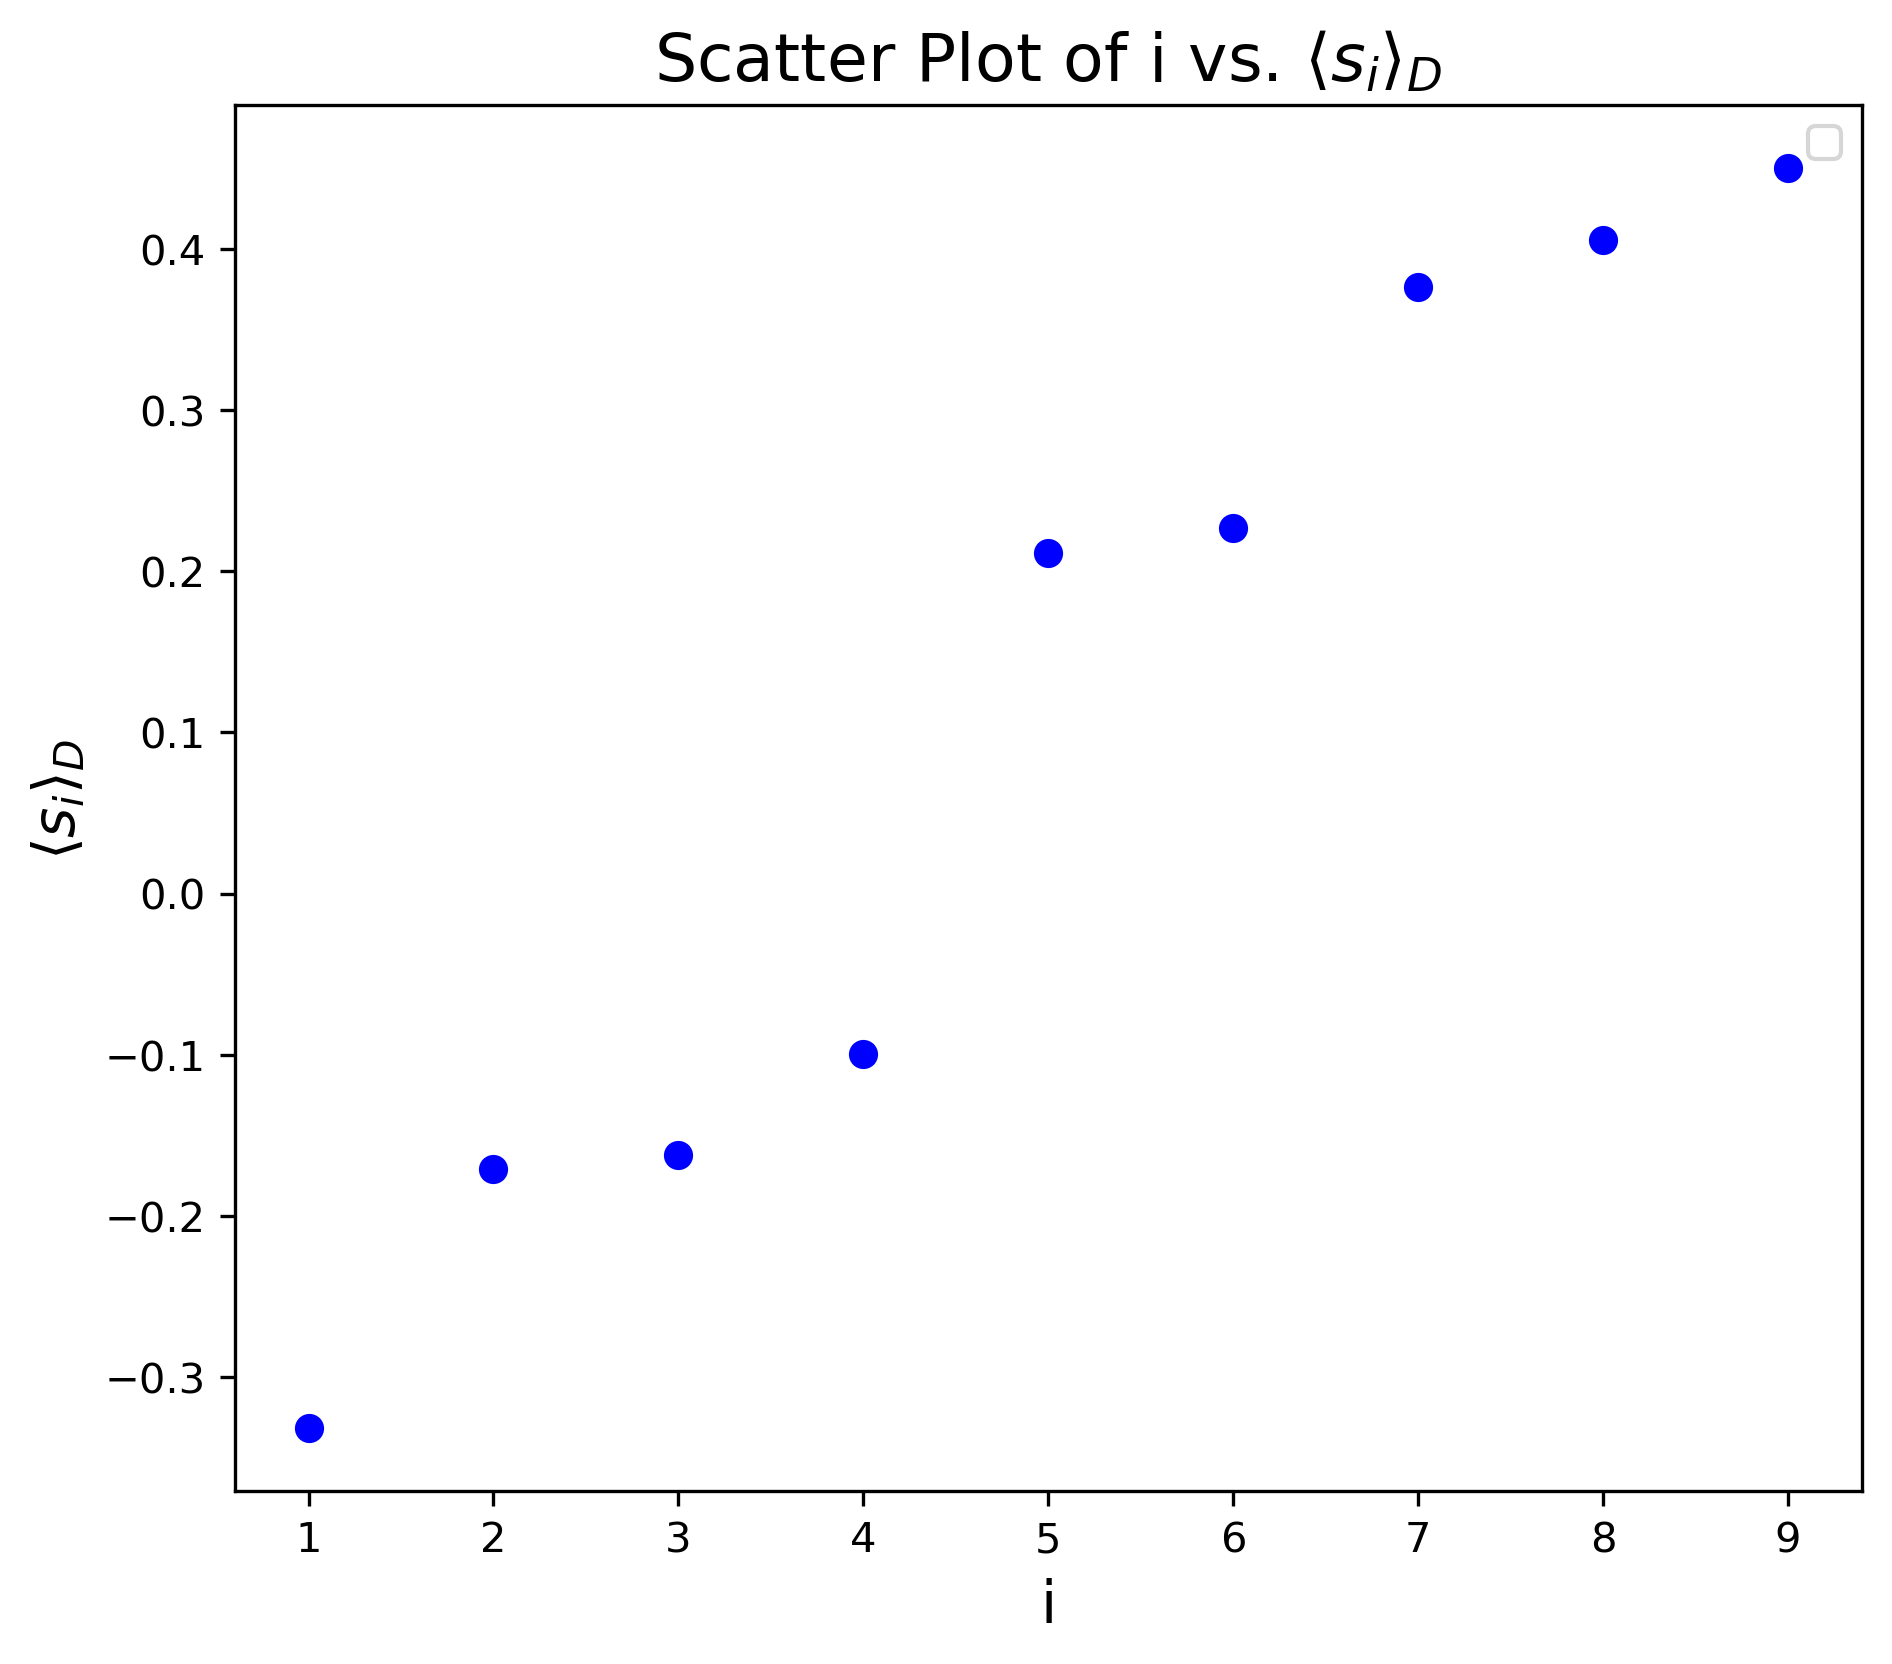

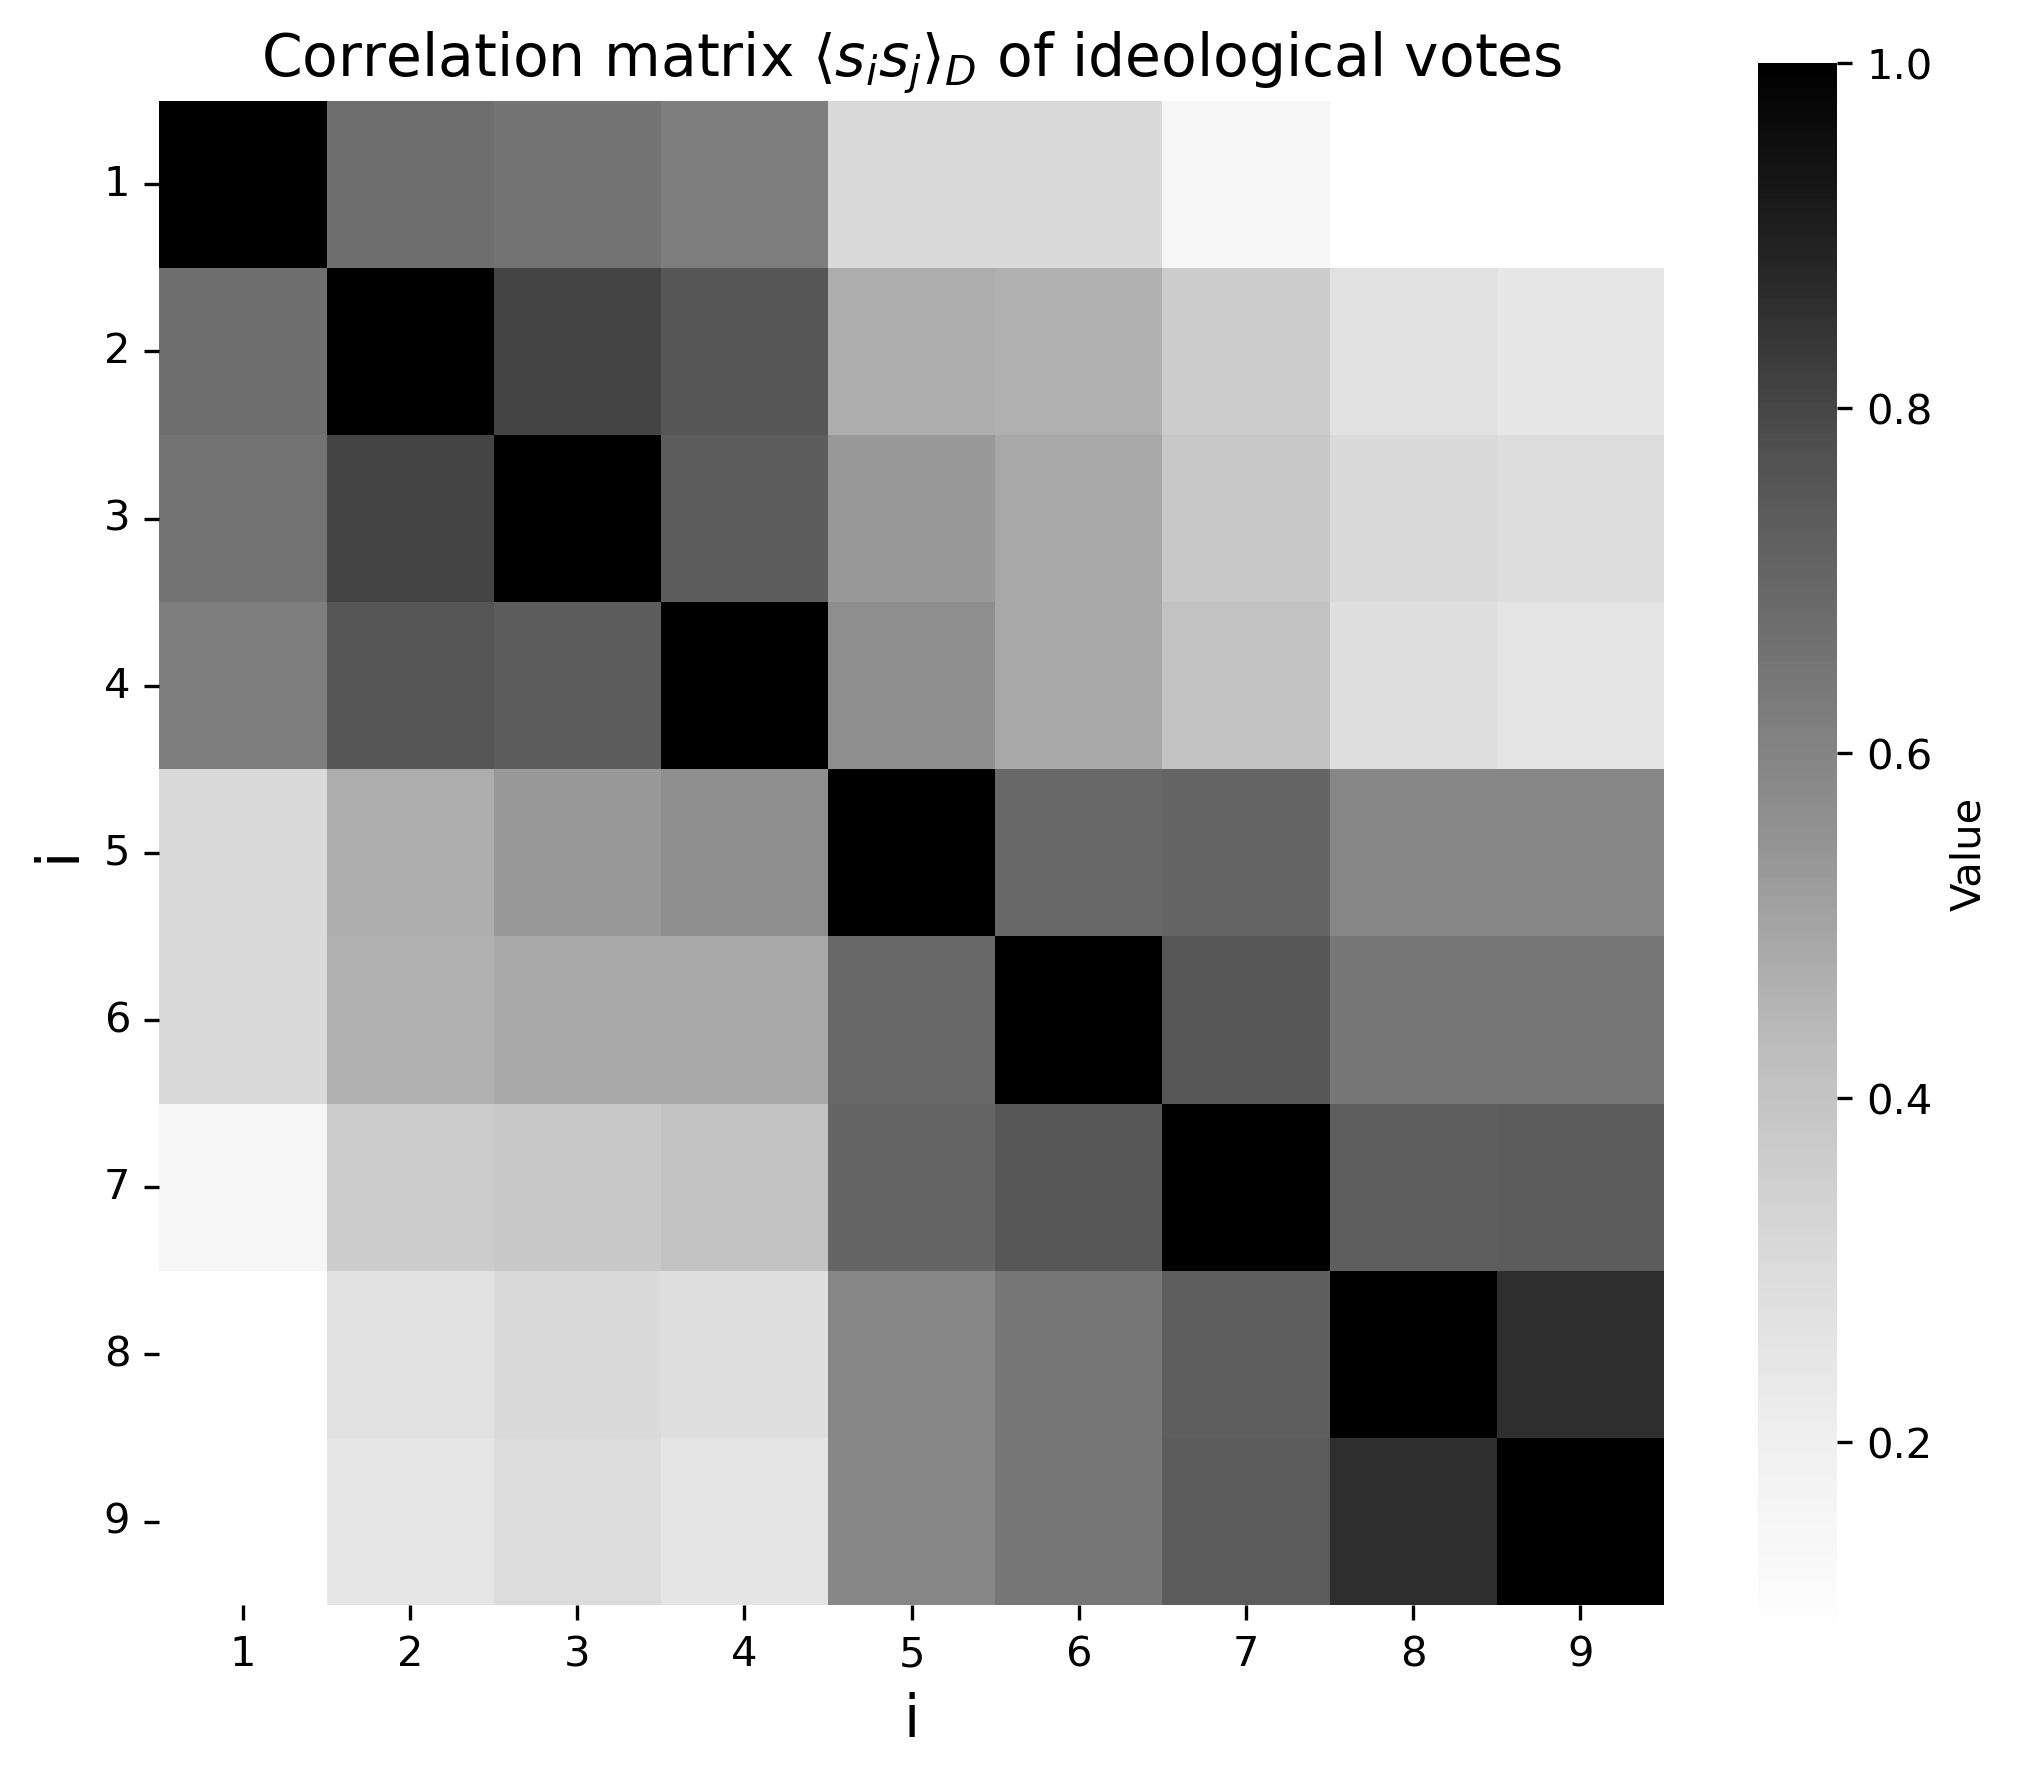

In [4]:
s_D = Q3.calculate_empirical_average_s(Q3.s_mat)
new_index = np.argsort(s_D)
s_mat = Q3.s_mat[:,new_index]
ss_D = Q3.calculate_empirical_average_ss(s_mat)

plot_scatter(np.linspace(1,n,n), s_D, file_name="figure/Q6_3_1")
plot_scatter(np.linspace(1,n,n), s_D[new_index], file_name="figure/Q6_3_2")
plot_heatmap(ss_D, file_name="figure/Q6_3_3")

### Q6.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


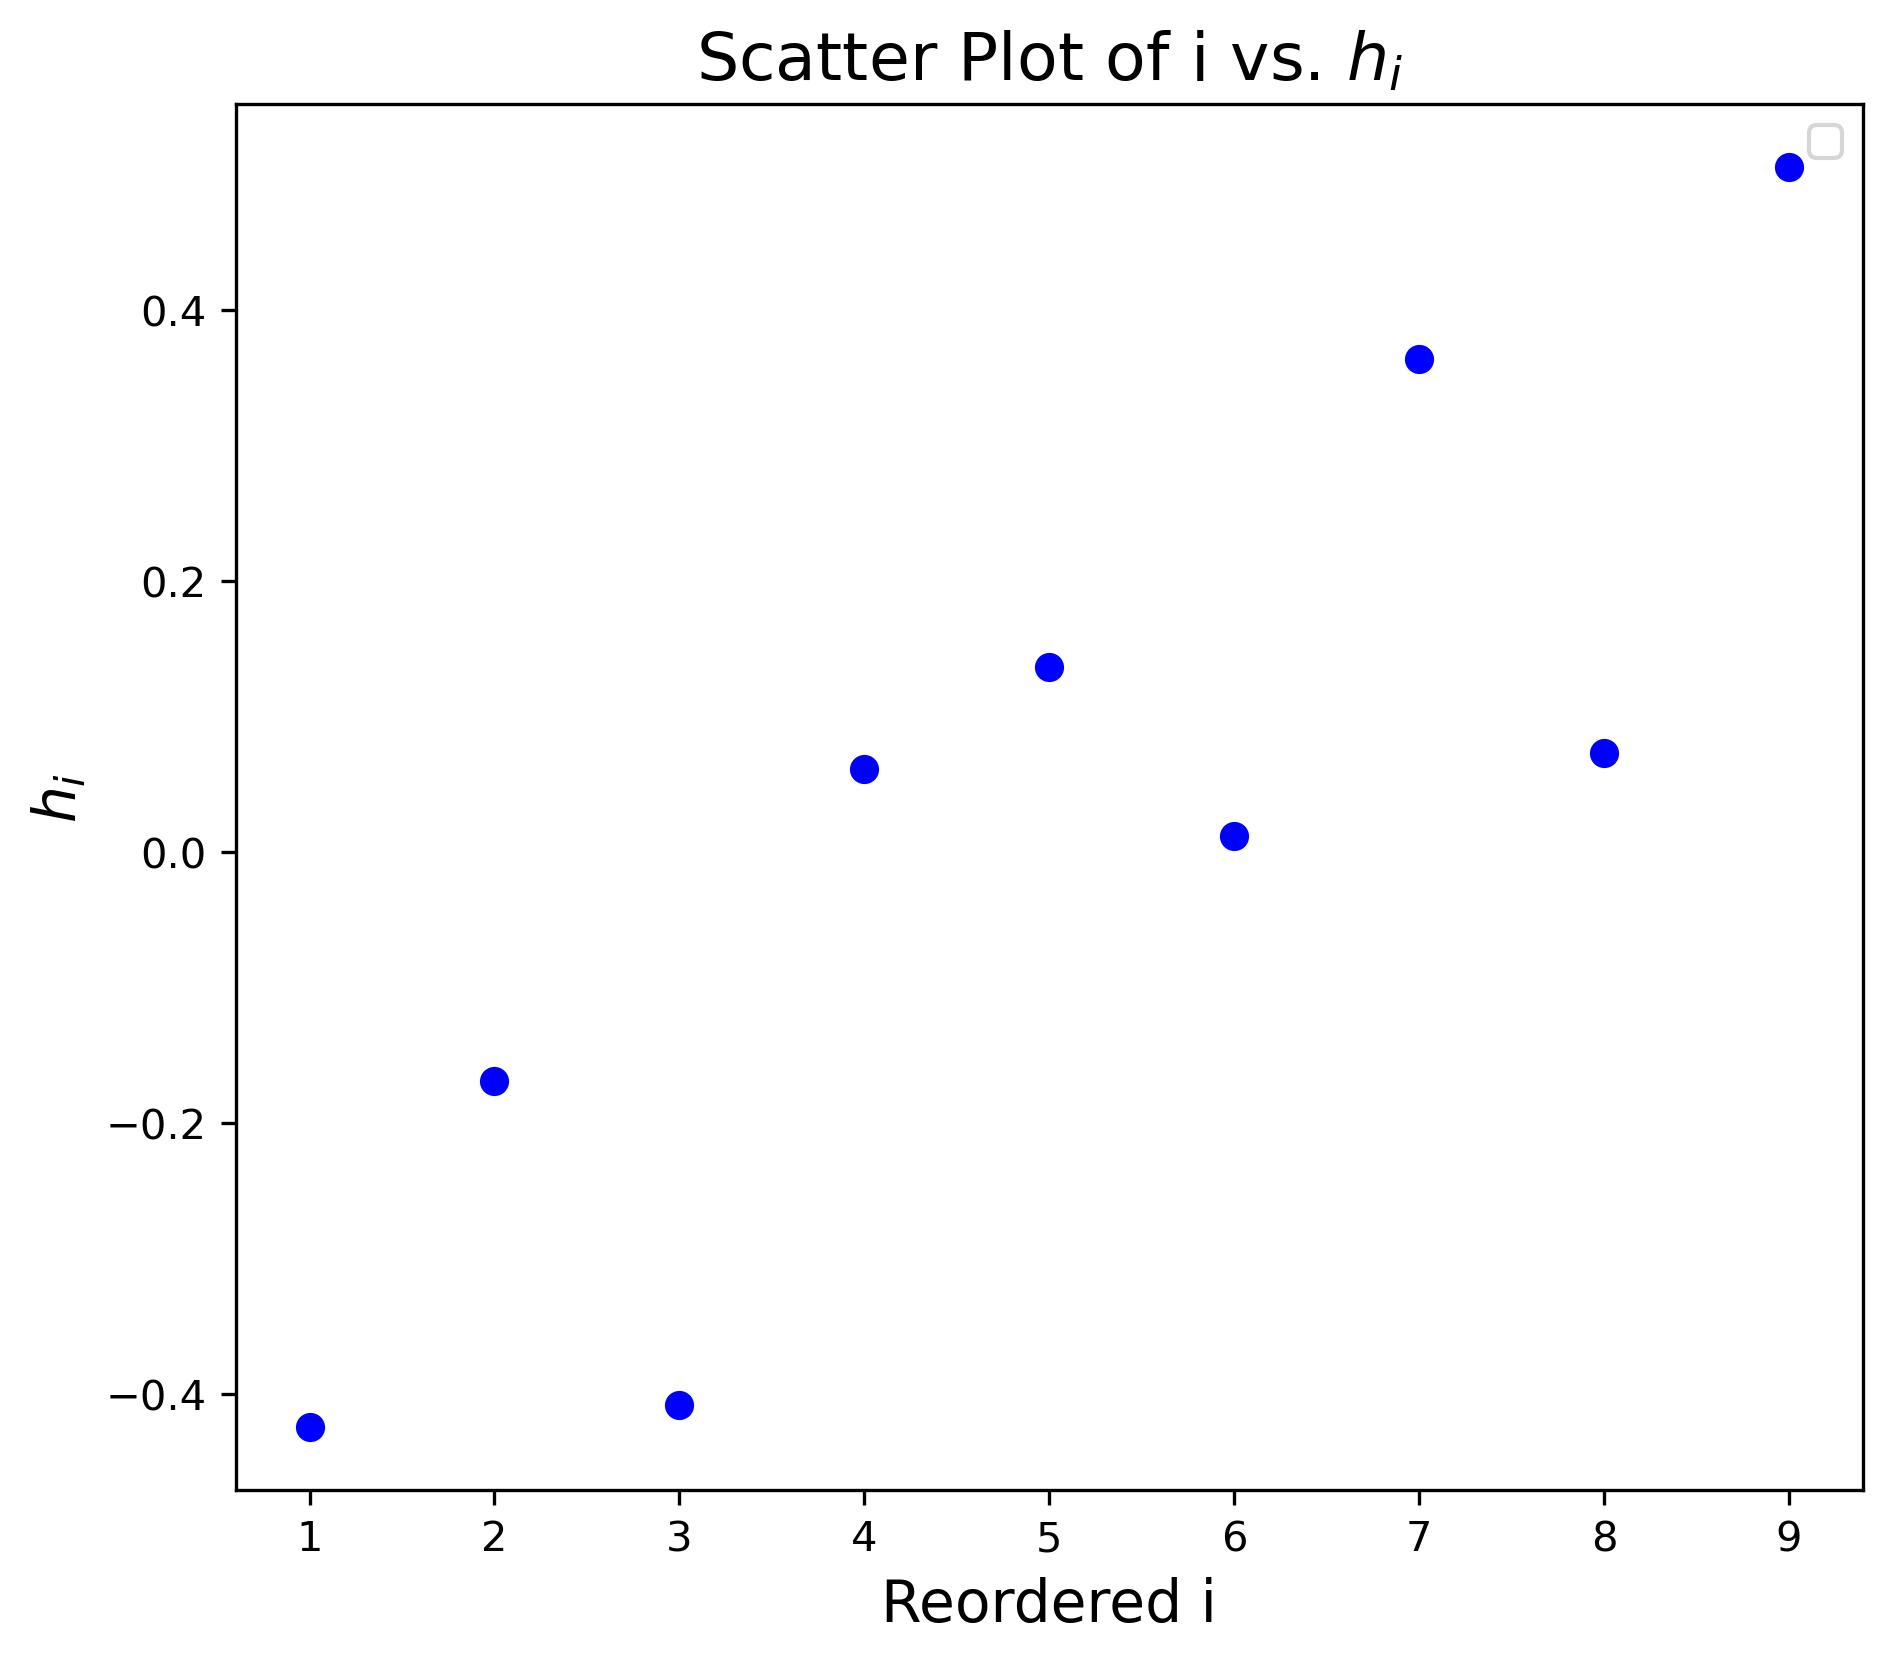

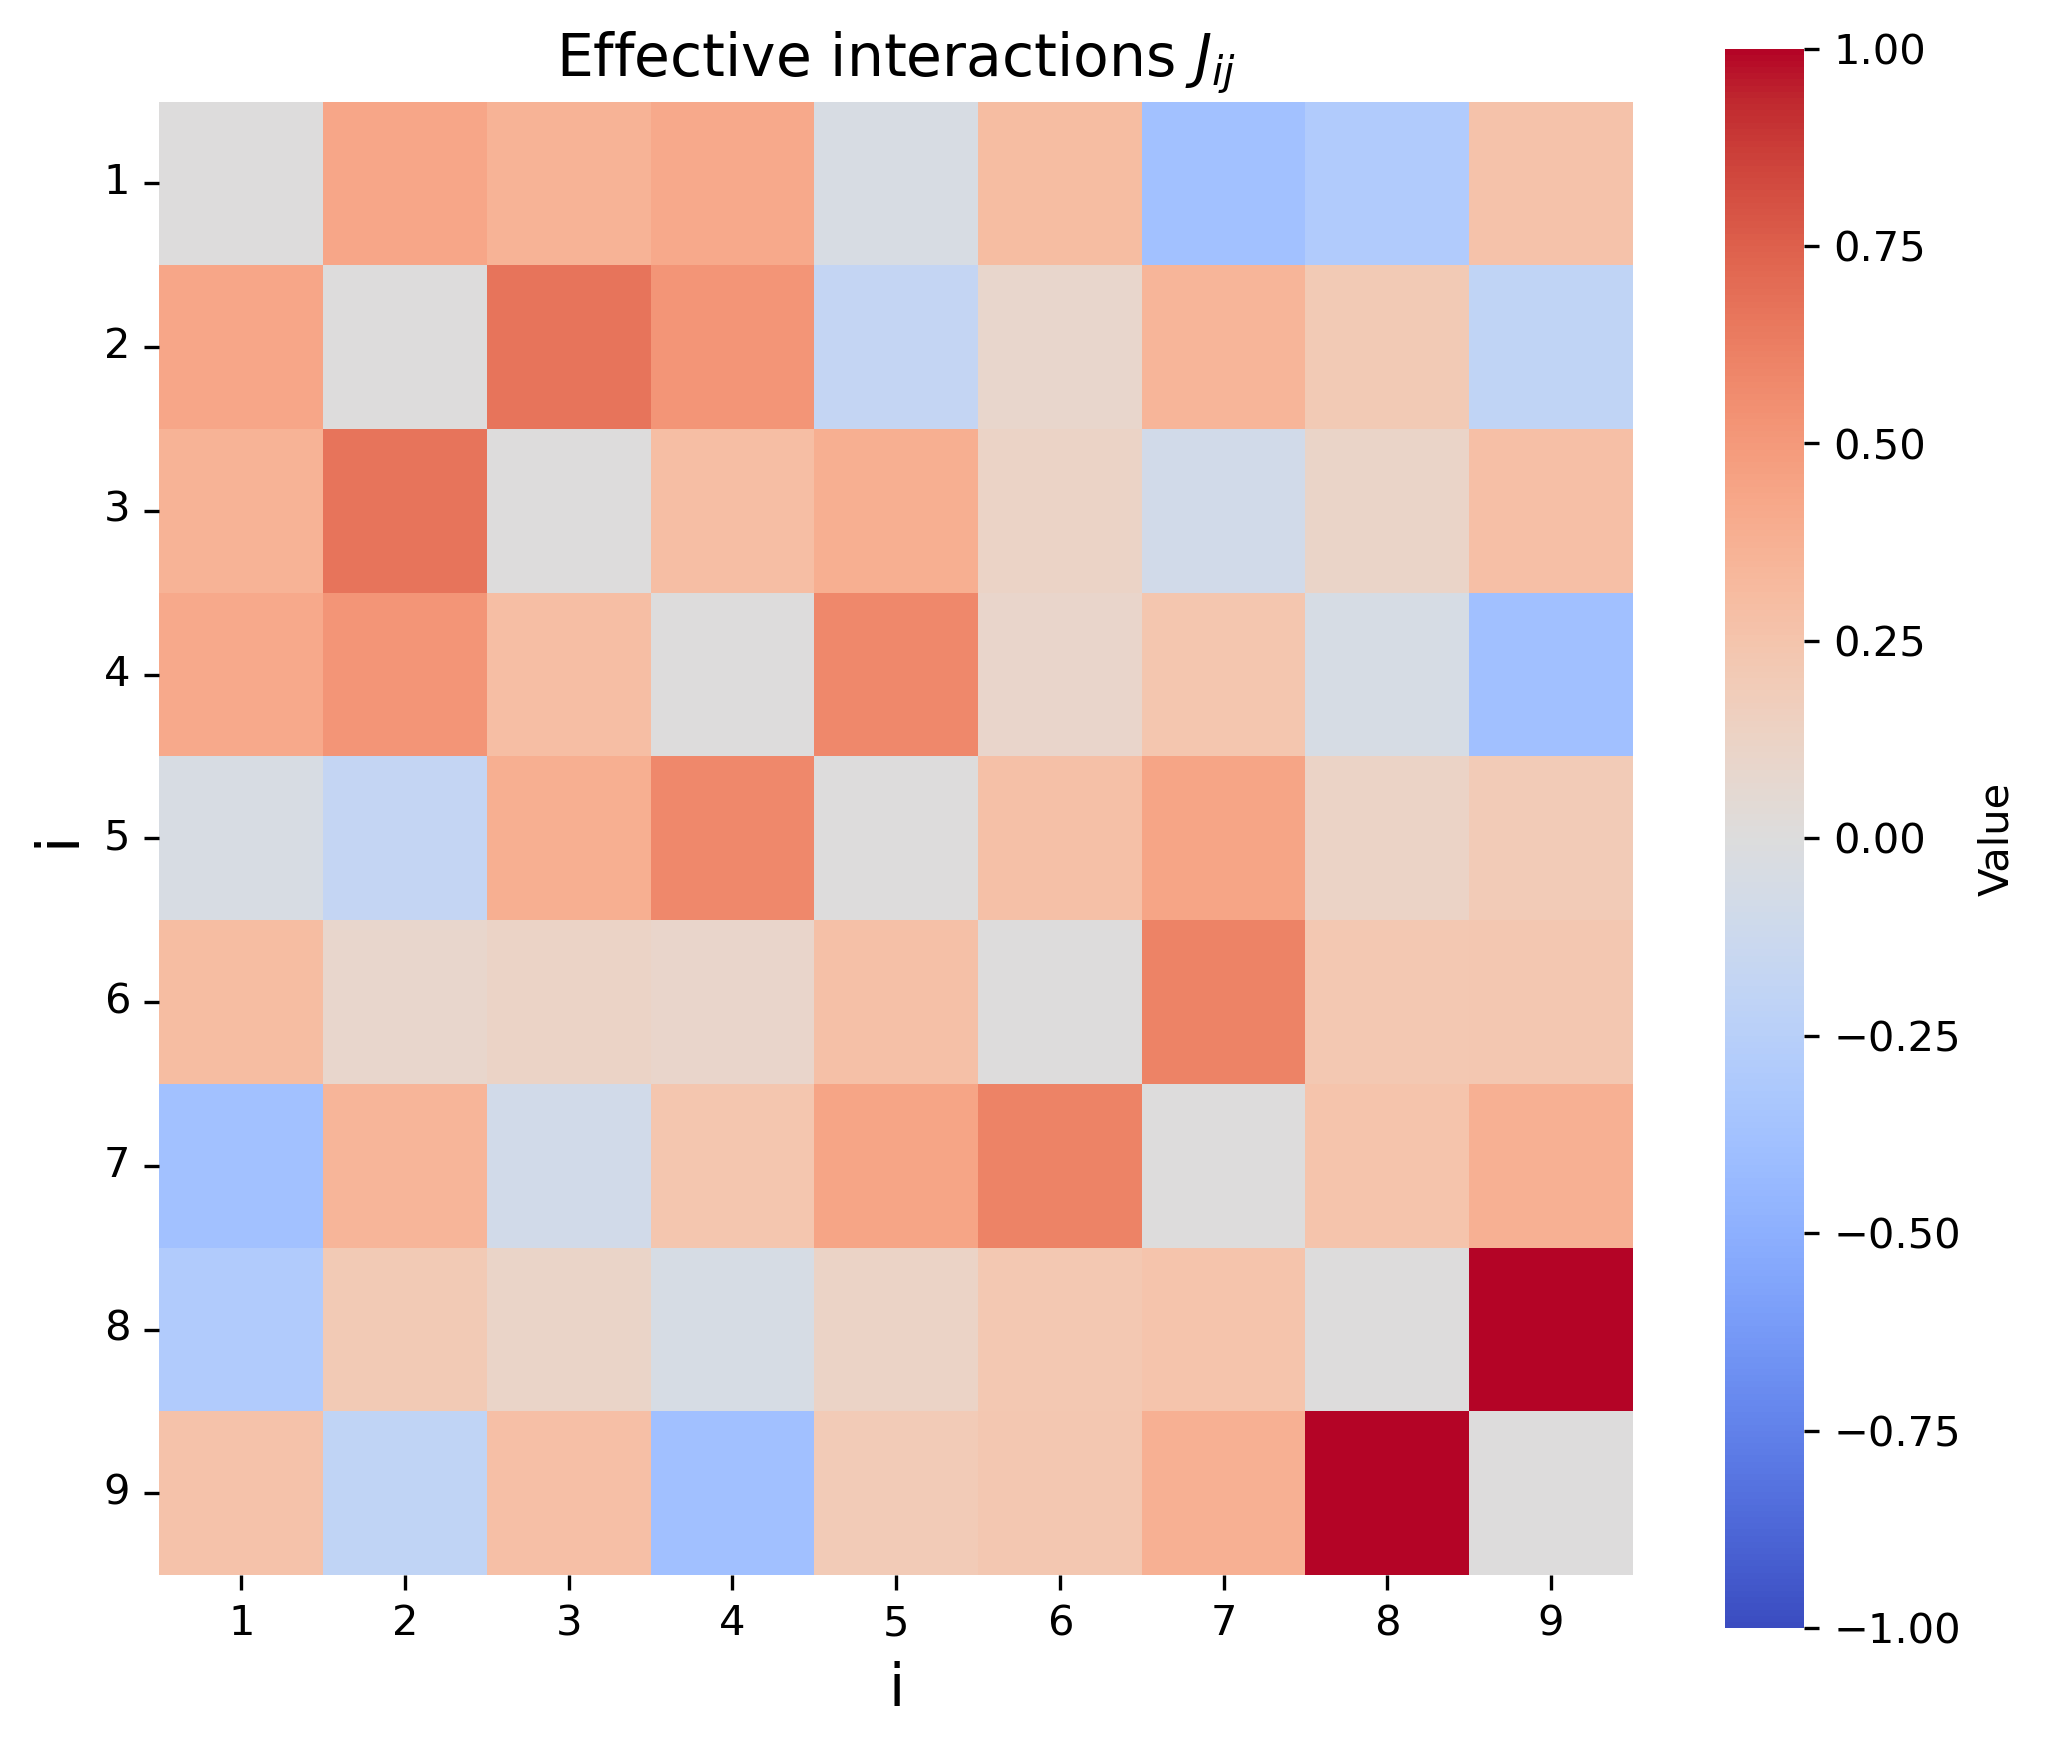

In [5]:
h_vec = Q3.h_vec[new_index]
J_mat = Q3.J_mat[new_index][:, new_index]
plot_scatter(np.linspace(1,n,n), h_vec, Q="Q6_4", file_name="figure/Q6_4_1")
plot_heatmap(J_mat, cmap="coolwarm", Q="Q6_4", file_name="figure/Q6_4_2")

### Q6.5

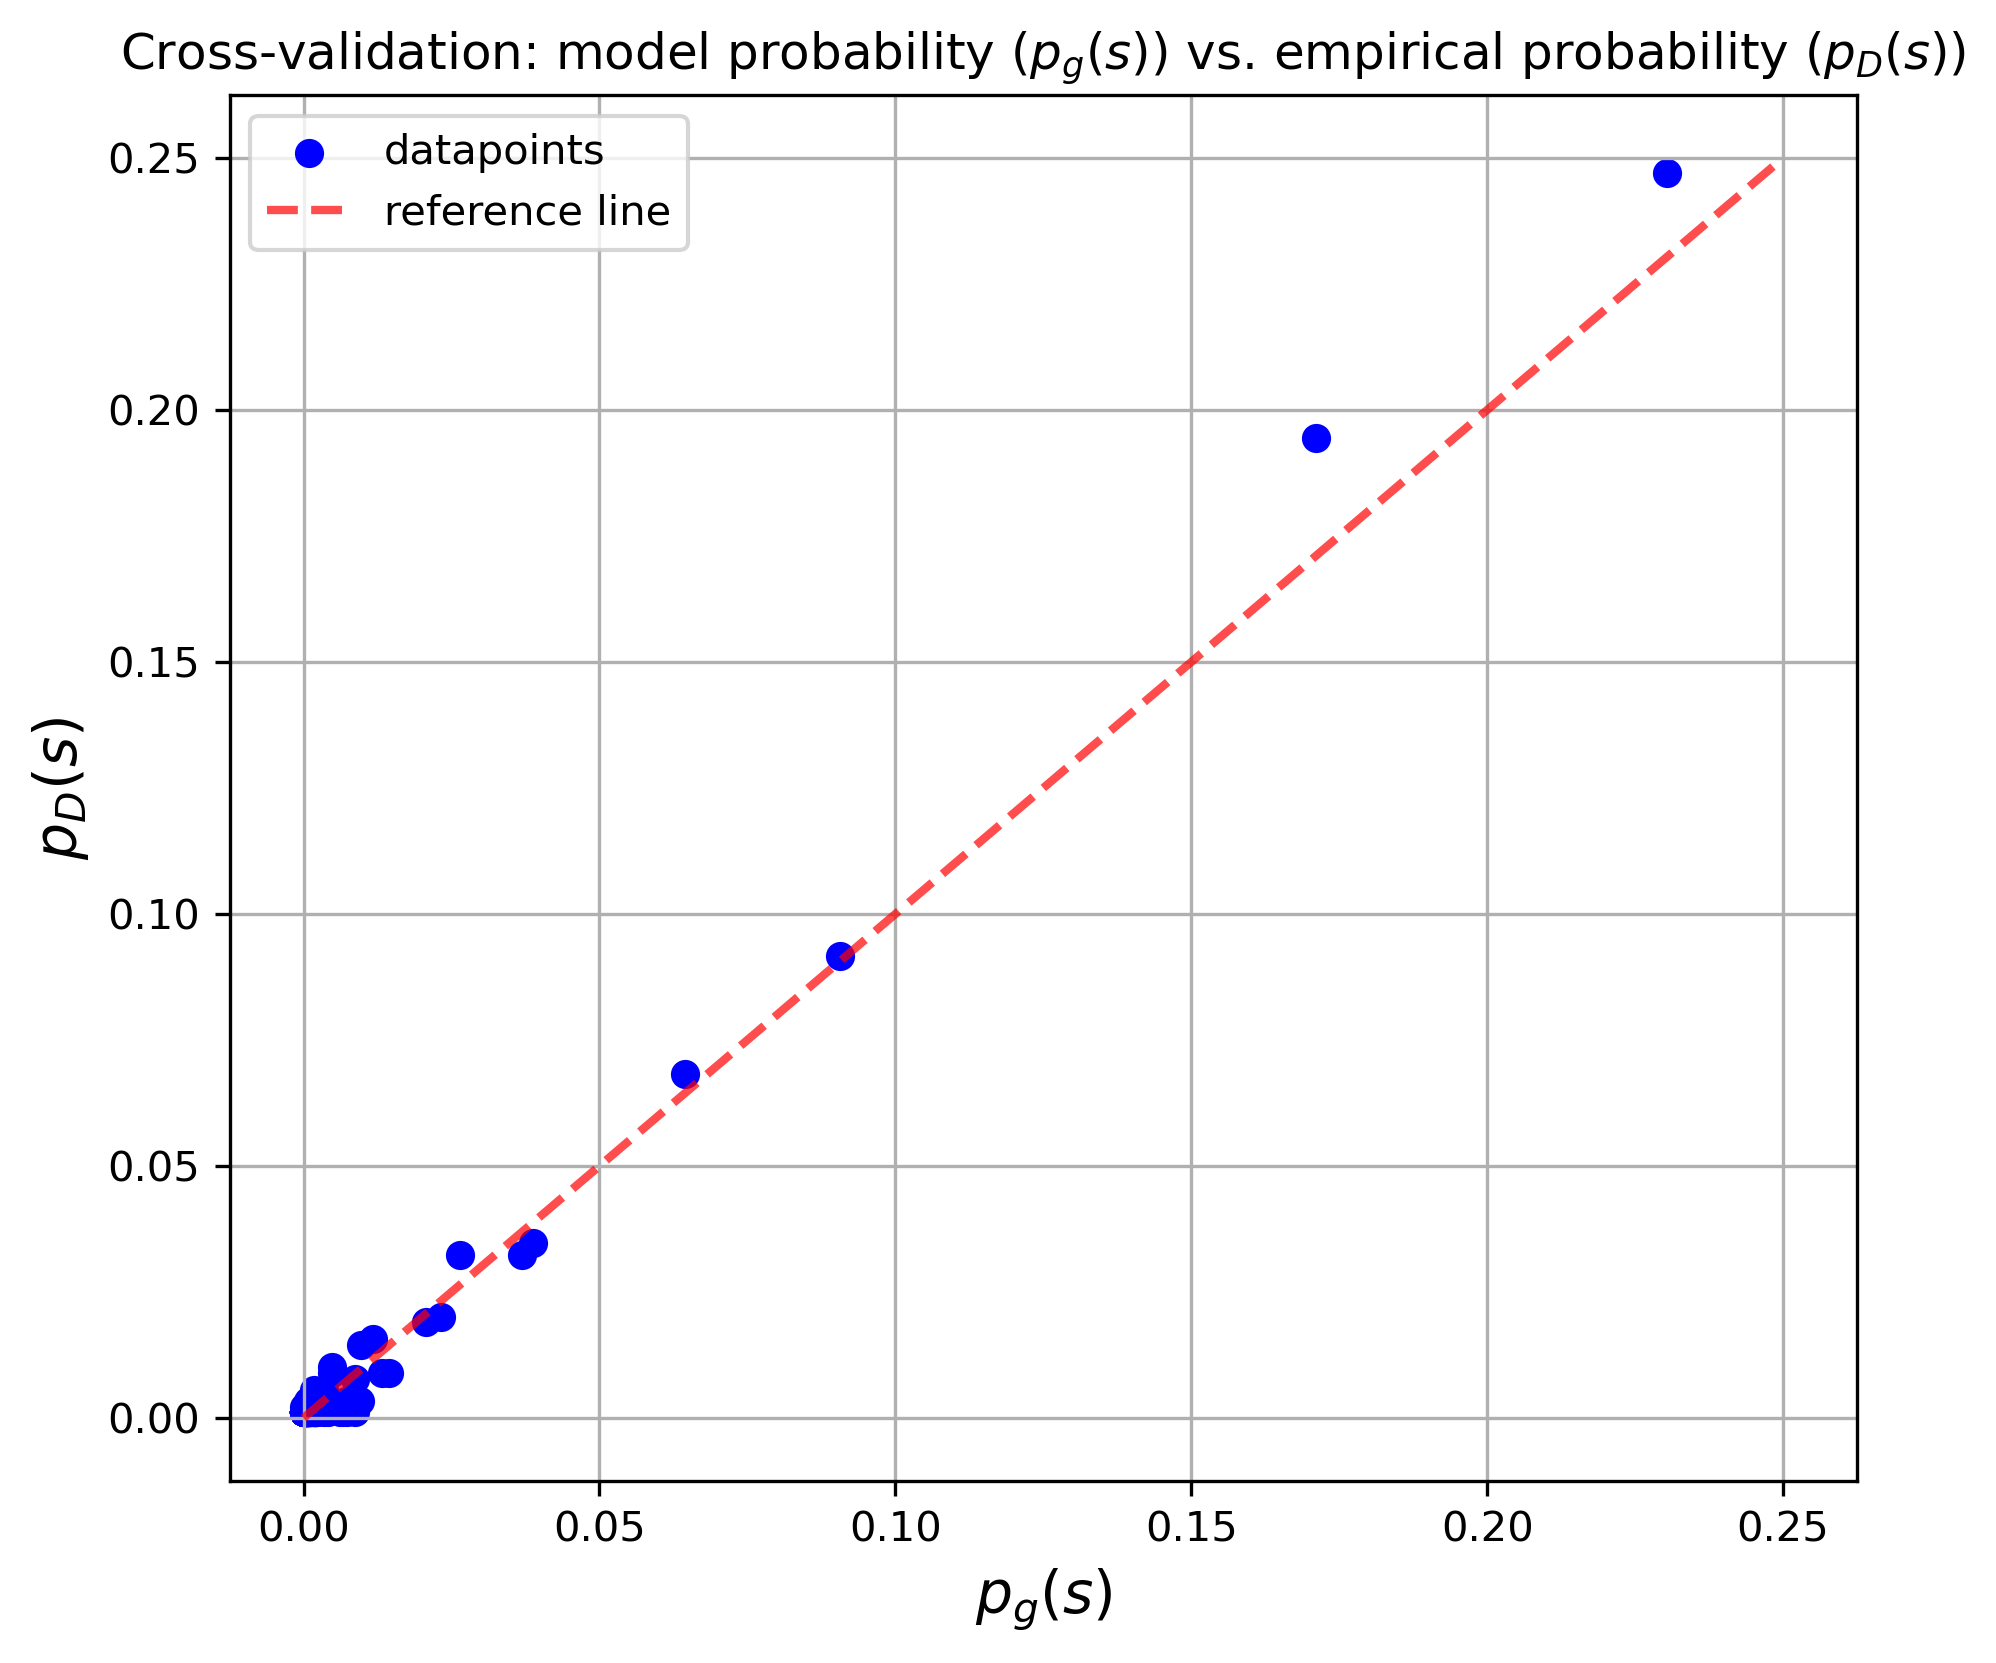

In [6]:
prob_emp = Q3.calculate_empirical_probability(s_mat, Q3.s_mat_set[:,new_index])
prob_ana = Q3.calculate_analytical_probability(h_vec, J_mat, Q3.s_mat_set[:,new_index])
plot_scatter(prob_ana, prob_emp, Q="Q6_5", label="datapoints", file_name="figure/Q6_5")

### Q6.6

model mean s_i [-0.33185259 -0.17094688 -0.16201143 -0.09944092  0.21117209  0.22681088
  0.37653224  0.40559195  0.45028082]
empirical mean s_i [-0.33184358 -0.17094972 -0.16201117 -0.09944134  0.21117318  0.22681564
  0.37653631  0.40558659  0.45027933]
model mean s_is_j [0.67373672 0.65586581 0.6201062  0.30950474 0.30726975 0.15307704
 0.08380282 0.08826721 0.80334975 0.75419519 0.47485956 0.46368641
 0.36759642 0.27597332 0.24916128 0.73184325 0.53296006 0.49049757
 0.38100677 0.31172907 0.29832613 0.56871396 0.49049467 0.40782244
 0.28492202 0.26256499 0.69385336 0.70502336 0.5910636  0.59106688
 0.75195154 0.64245657 0.64245922 0.72960795 0.73854347 0.86145561]
empirical mean s_is_j [0.67374302 0.65586592 0.62011173 0.30949721 0.30726257 0.15307263
 0.08379888 0.08826816 0.80335196 0.75418994 0.47486034 0.46368715
 0.36759777 0.27597765 0.24916201 0.73184358 0.53296089 0.49050279
 0.38100559 0.31173184 0.29832402 0.56871508 0.49050279 0.40782123
 0.2849162  0.26256983 0.69385475

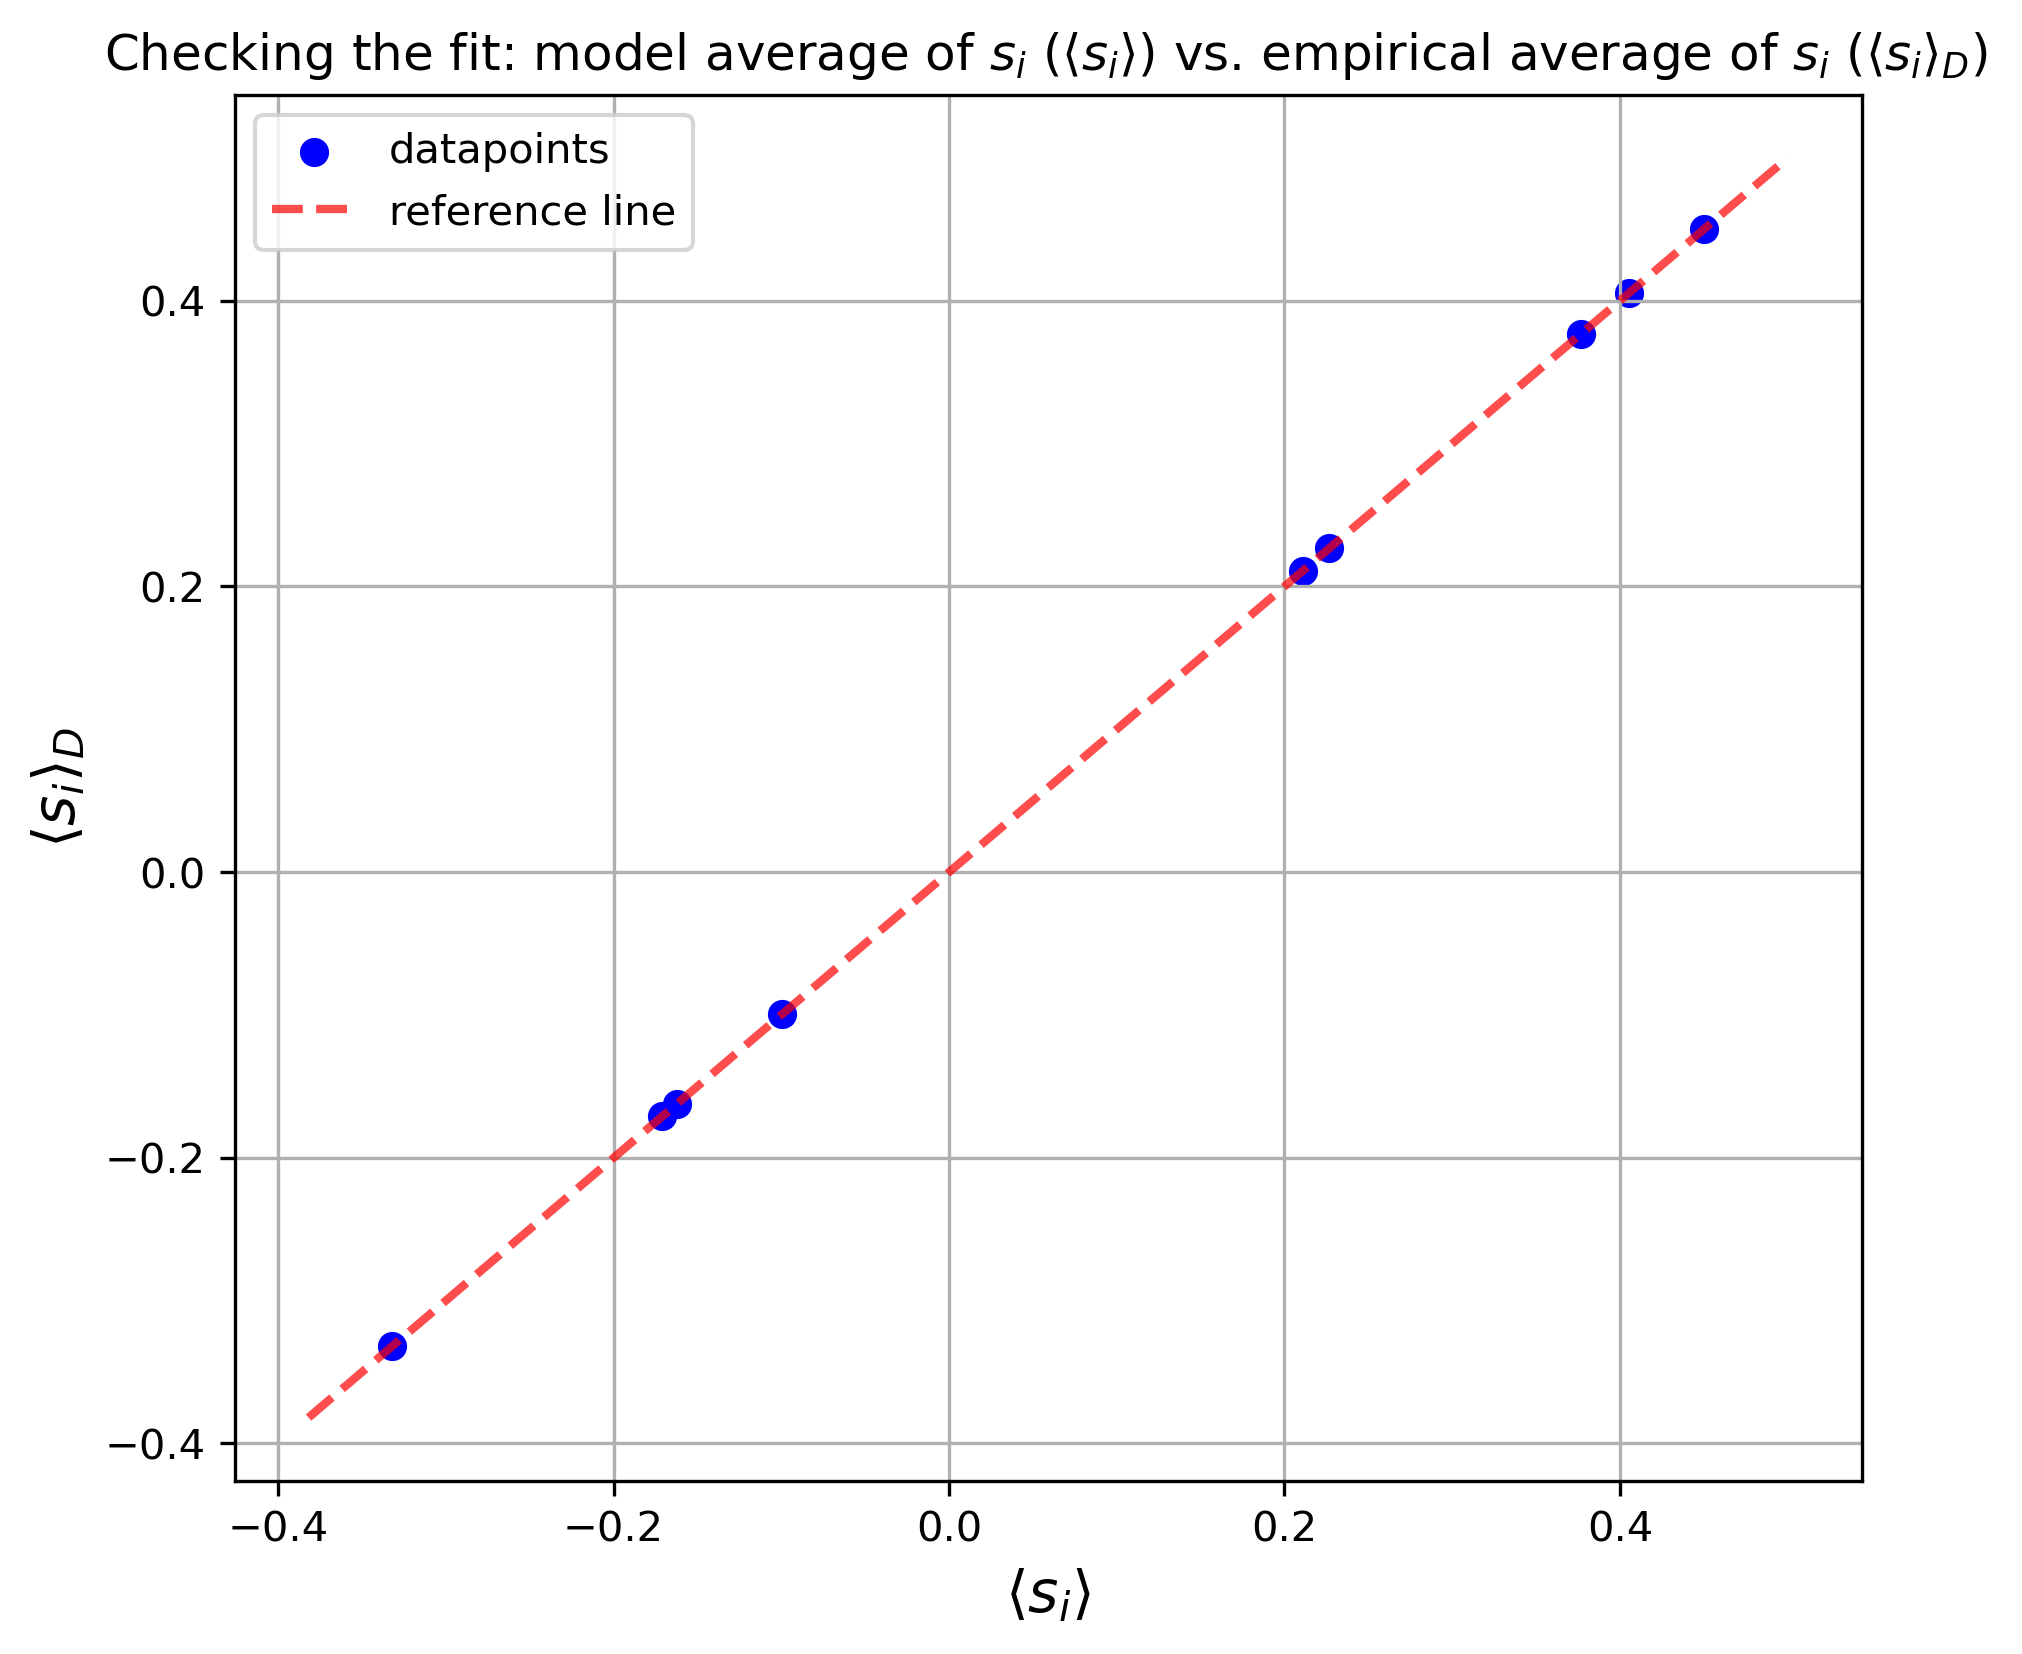

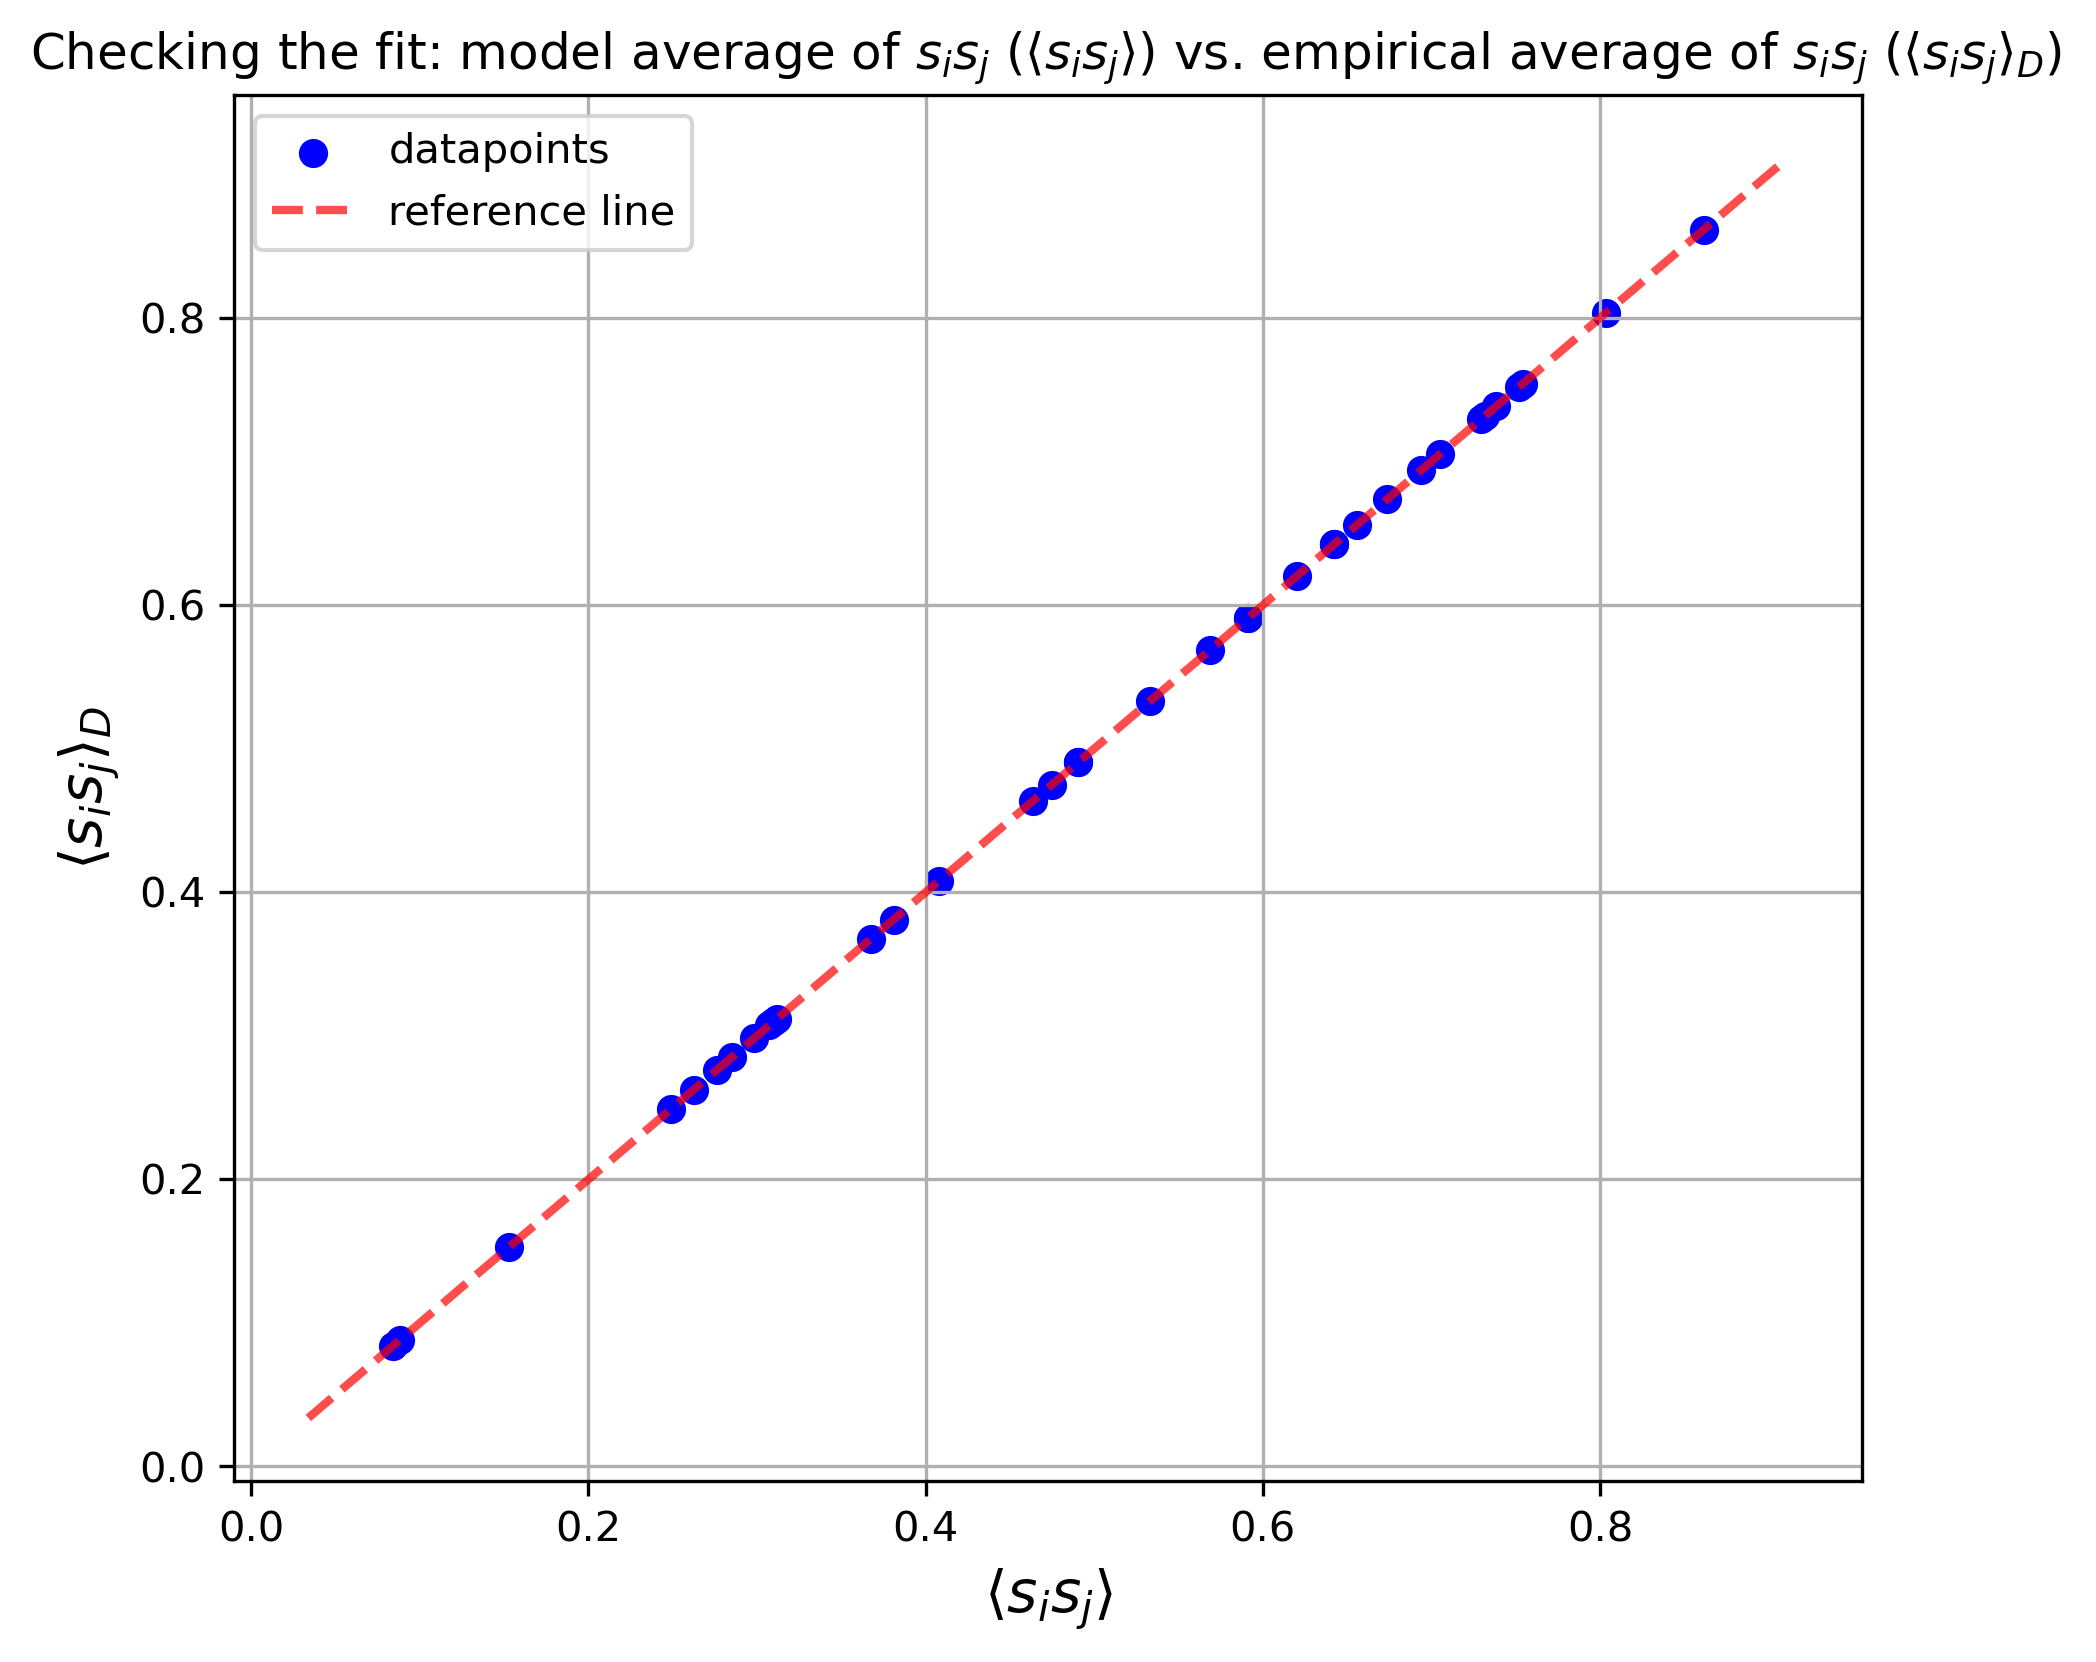

In [15]:
s_list = Q3.s_list
p_g = Q3.calculate_analytical_probability(h_vec, J_mat, s_list)
mean_si = np.sum(s_list * p_g[:, None], axis=0)  
mean_sisj = np.sum(
    (s_list[:, :, None] * s_list[:, None, :]) * p_g[:, None, None],
    axis=0
)  
print("model mean s_i", mean_si)
print("empirical mean s_i", np.mean(s_mat, axis=0))
print("model mean s_is_j", Q3.matrix_to_vector(mean_sisj))
print("empirical mean s_is_j", Q3.matrix_to_vector(ss_D))

plot_scatter(mean_si, np.mean(s_mat, axis=0), Q="Q6_6", label="datapoints", file_name="figure/Q6_6_1")
plot_scatter(Q3.matrix_to_vector(mean_sisj), Q3.matrix_to_vector(ss_D), Q="Q6_6_2", label="datapoints", file_name="figure/Q6_6_2")

### Q6.7

P(0 conservative vote from no coupling model) = 0.0005
P(1 conservative vote from no coupling model) = 0.0013
P(2 conservative vote from no coupling model) = 0.0030
P(3 conservative vote from no coupling model) = 0.0067
P(4 conservative vote from no coupling model) = 0.0106
P(5 conservative vote from no coupling model) = 0.0162
P(6 conservative vote from no coupling model) = 0.0133
P(7 conservative vote from no coupling model) = 0.0096
P(8 conservative vote from no coupling model) = 0.0068
P(9 conservative vote from no coupling model) = 0.0034


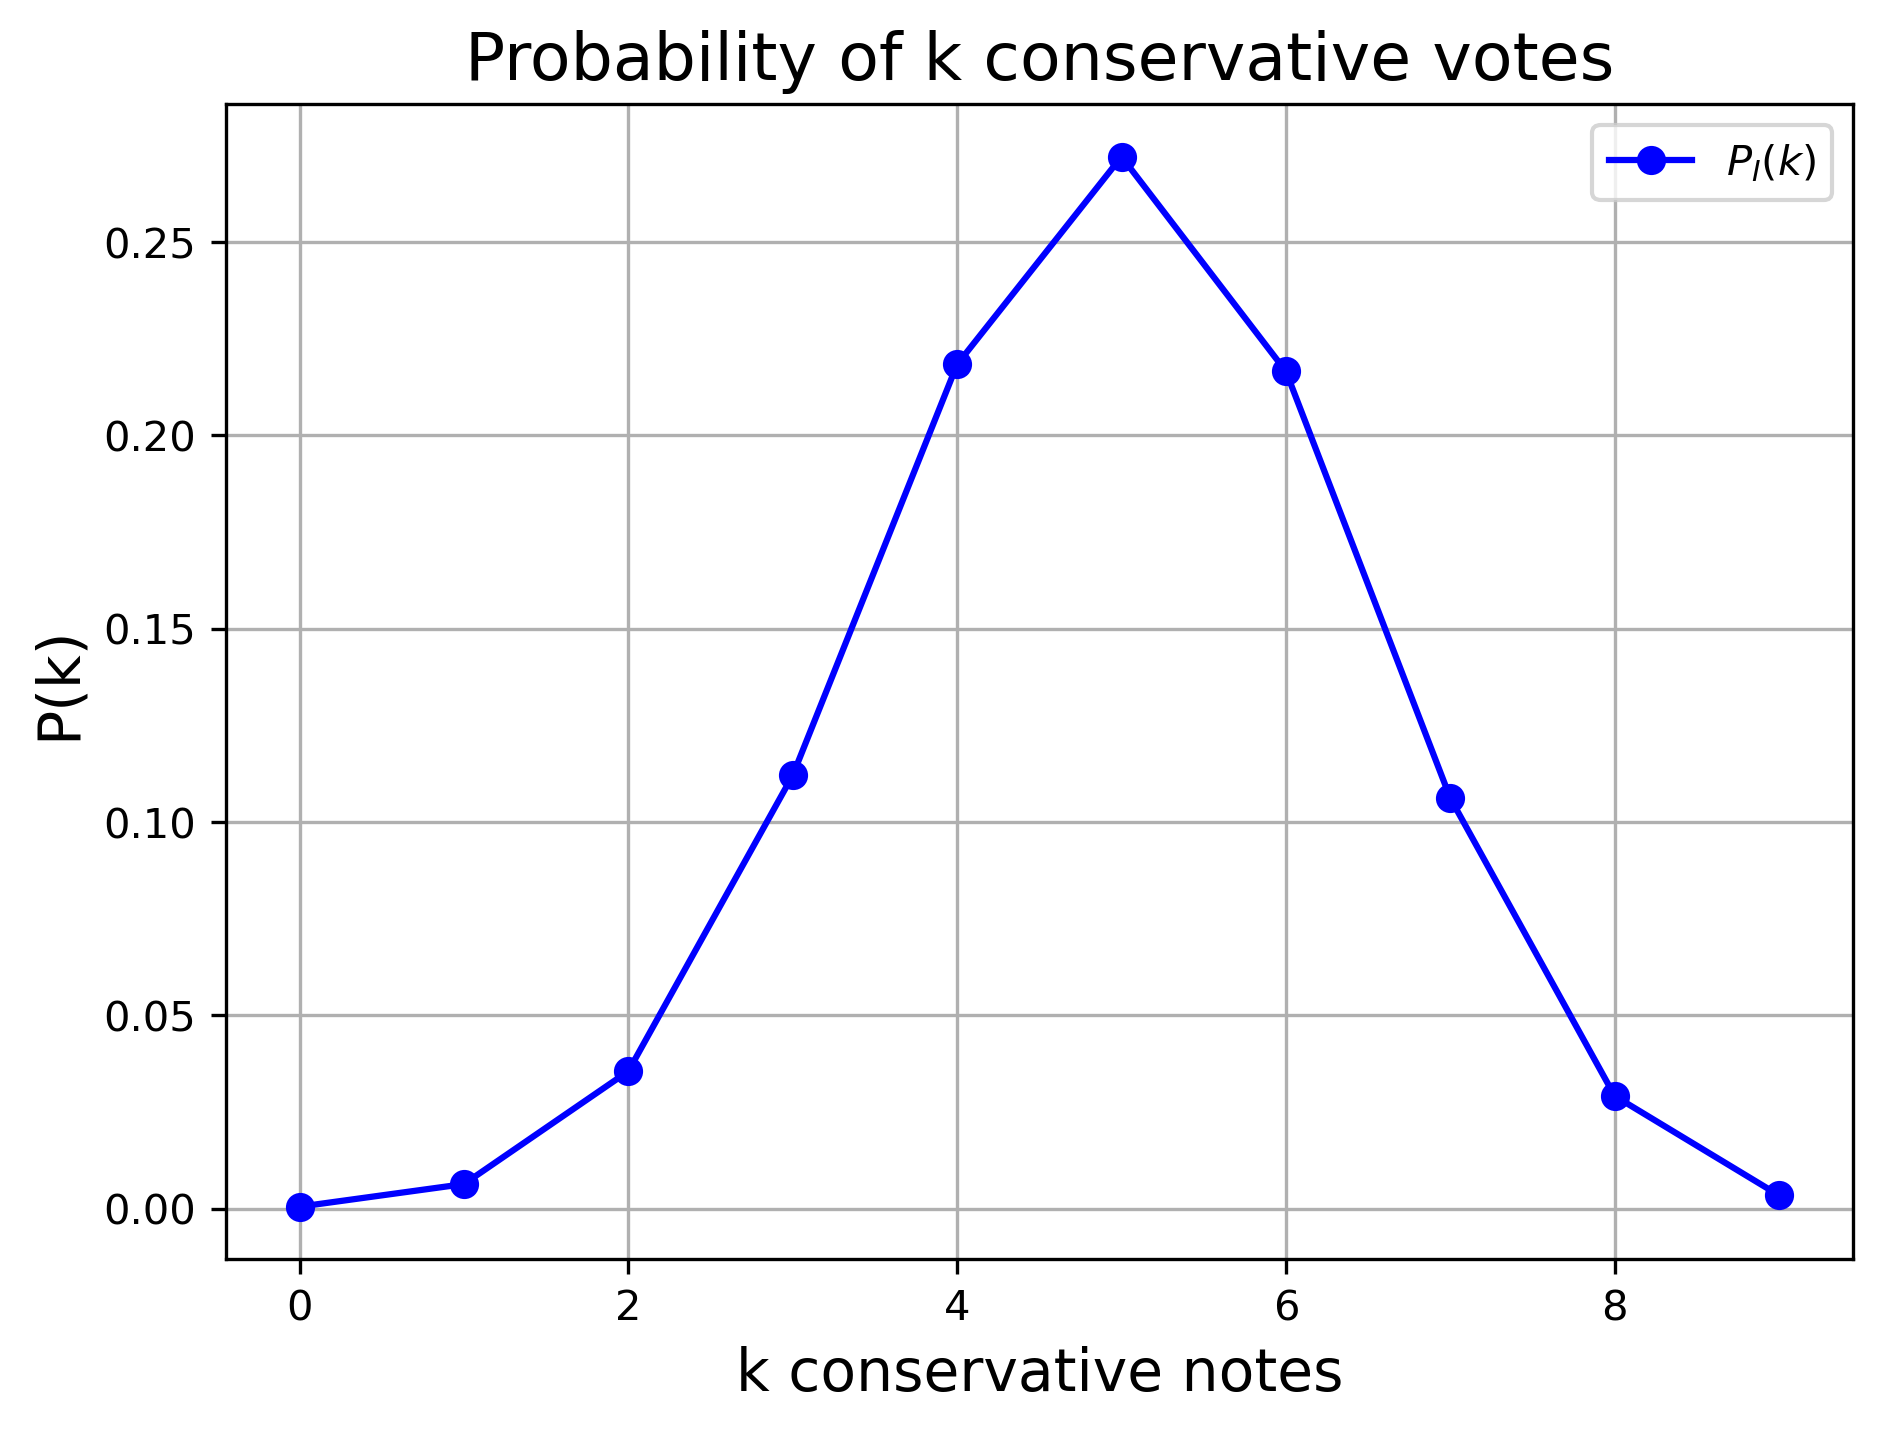

In [8]:
prob_cons = Q3.calculate_voting_rate(s_mat)
P = [Q3.calculate_voting_prob_from_no_coupling_model(prob_cons, k) for k in range(n+1)]

plt.figure(figsize=(7, 5), dpi=300)
plot_line(P, label=fr"$P_I(k)$")
plt.savefig("figure/Q6_7")

### Q6.8

P(0 conservative vote from data) = 0.1944
P(1 conservative vote from data) = 0.0223
P(2 conservative vote from data) = 0.0547
P(3 conservative vote from data) = 0.0704
P(4 conservative vote from data) = 0.0883
P(5 conservative vote from data) = 0.1218
P(6 conservative vote from data) = 0.0581
P(7 conservative vote from data) = 0.0670
P(8 conservative vote from data) = 0.0760
P(9 conservative vote from data) = 0.2469
0.24692737430167597


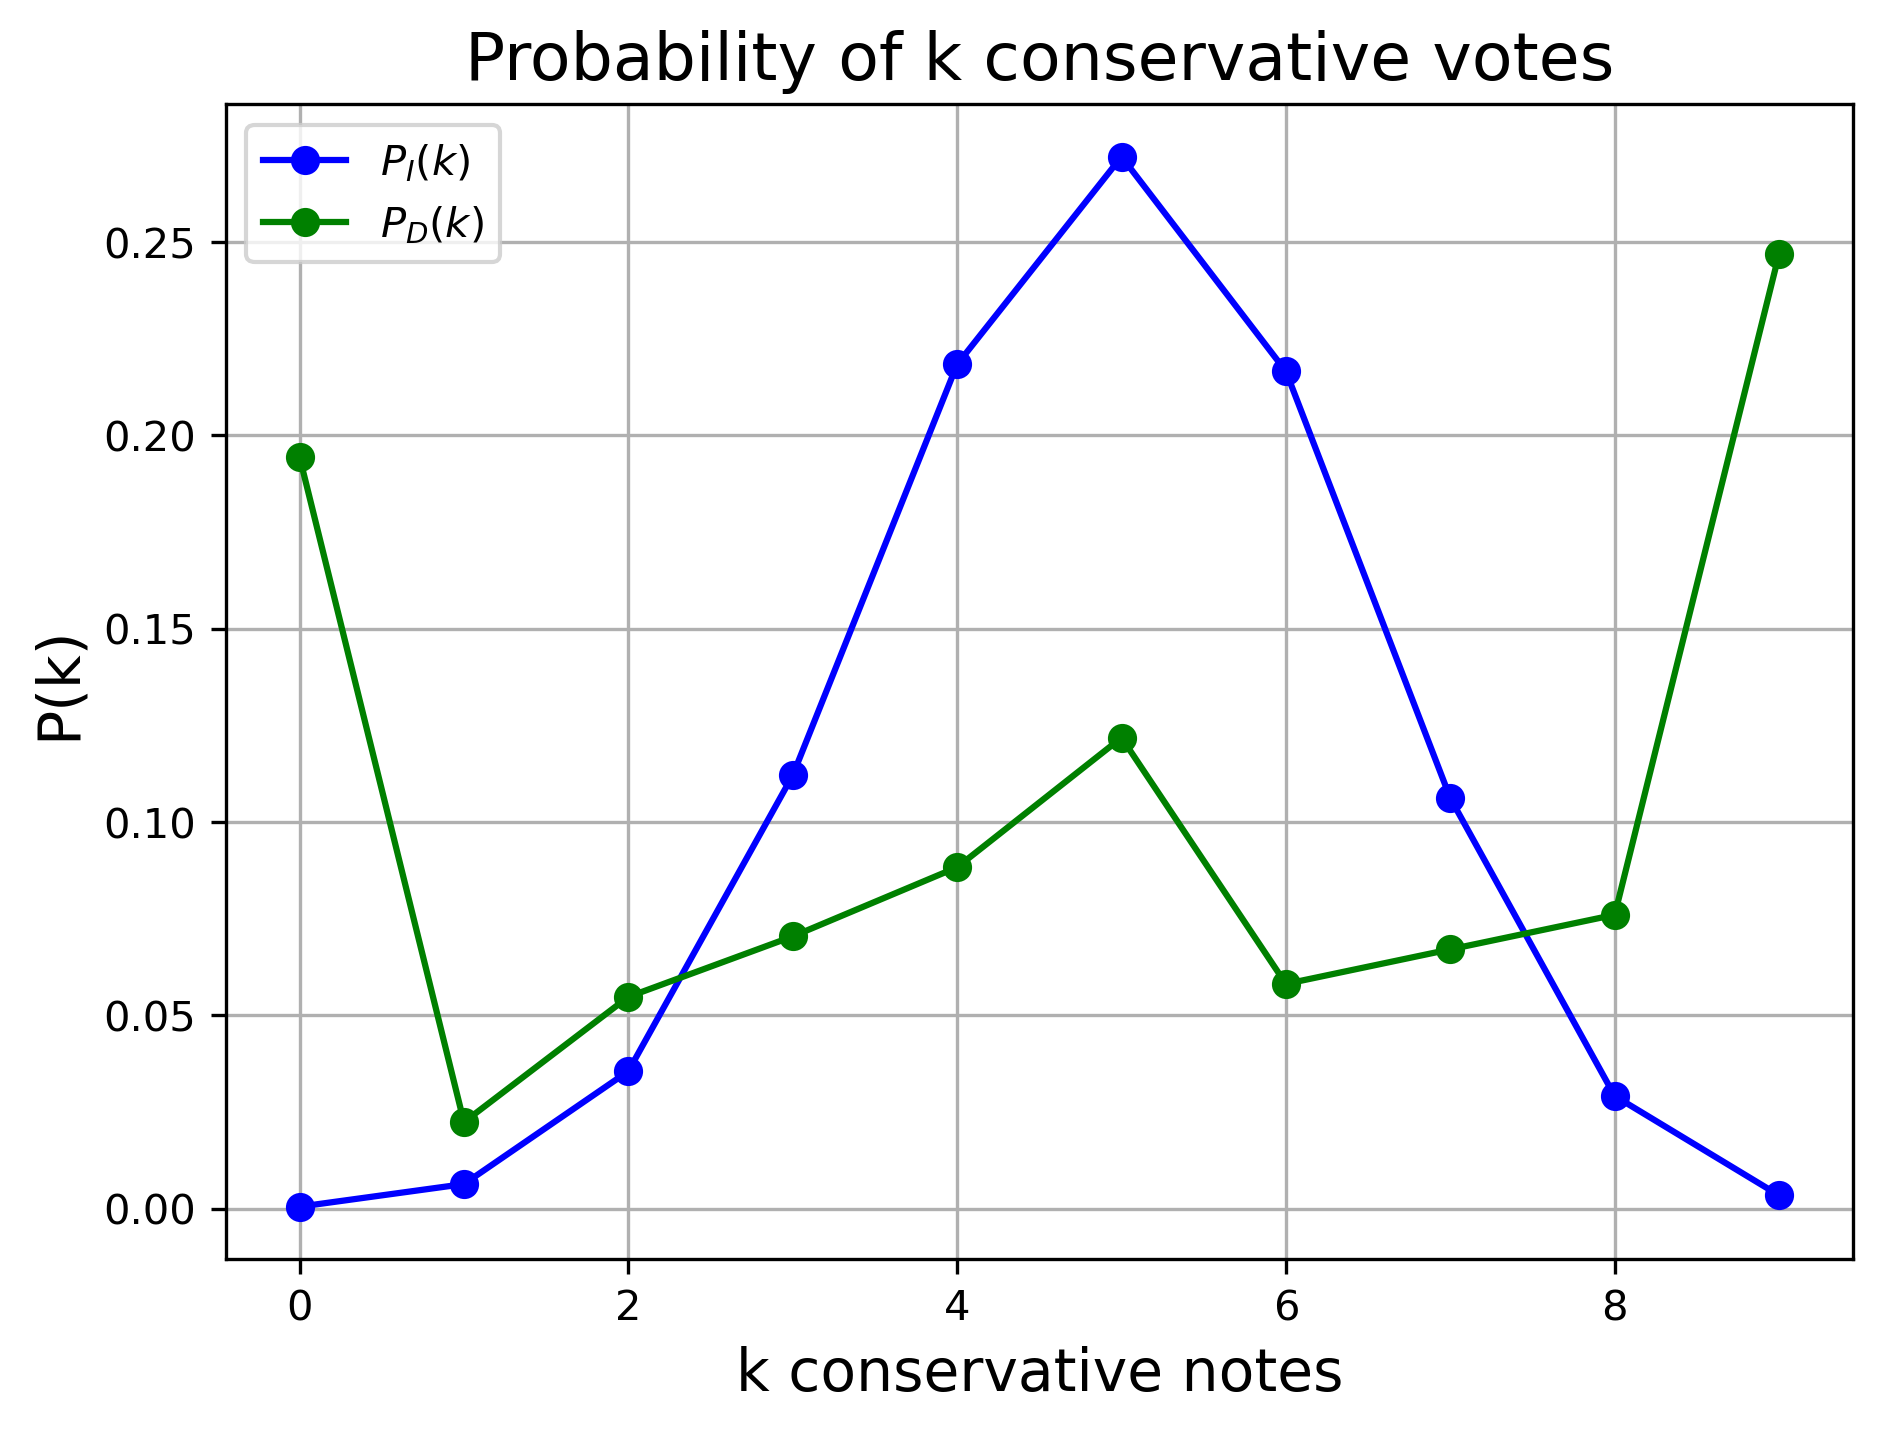

In [9]:
P_data = [Q3.calculate_voting_prob_from_data(s_mat, k) for k in range(n+1)]
print(max(P_data))

plt.figure(figsize=(7, 5), dpi=300)
plot_line(P, label=fr"$P_I(k)$")
plot_line(P_data, color="green", label=fr"$P_D(k)$")
plt.savefig("figure/Q6_8")

### Q6.9

P(0 conservative votes from Ising model) = 0.1711
P(1 conservative vote from Ising model) = 0.0597
P(2 conservative votes from Ising model) = 0.0615
P(3 conservative votes from Ising model) = 0.0552
P(4 conservative votes from Ising model) = 0.0799
P(5 conservative votes from Ising model) = 0.1157
P(6 conservative votes from Ising model) = 0.0608
P(7 conservative votes from Ising model) = 0.0568
P(8 conservative votes from Ising model) = 0.1088
P(9 conservative votes from Ising model) = 0.2304


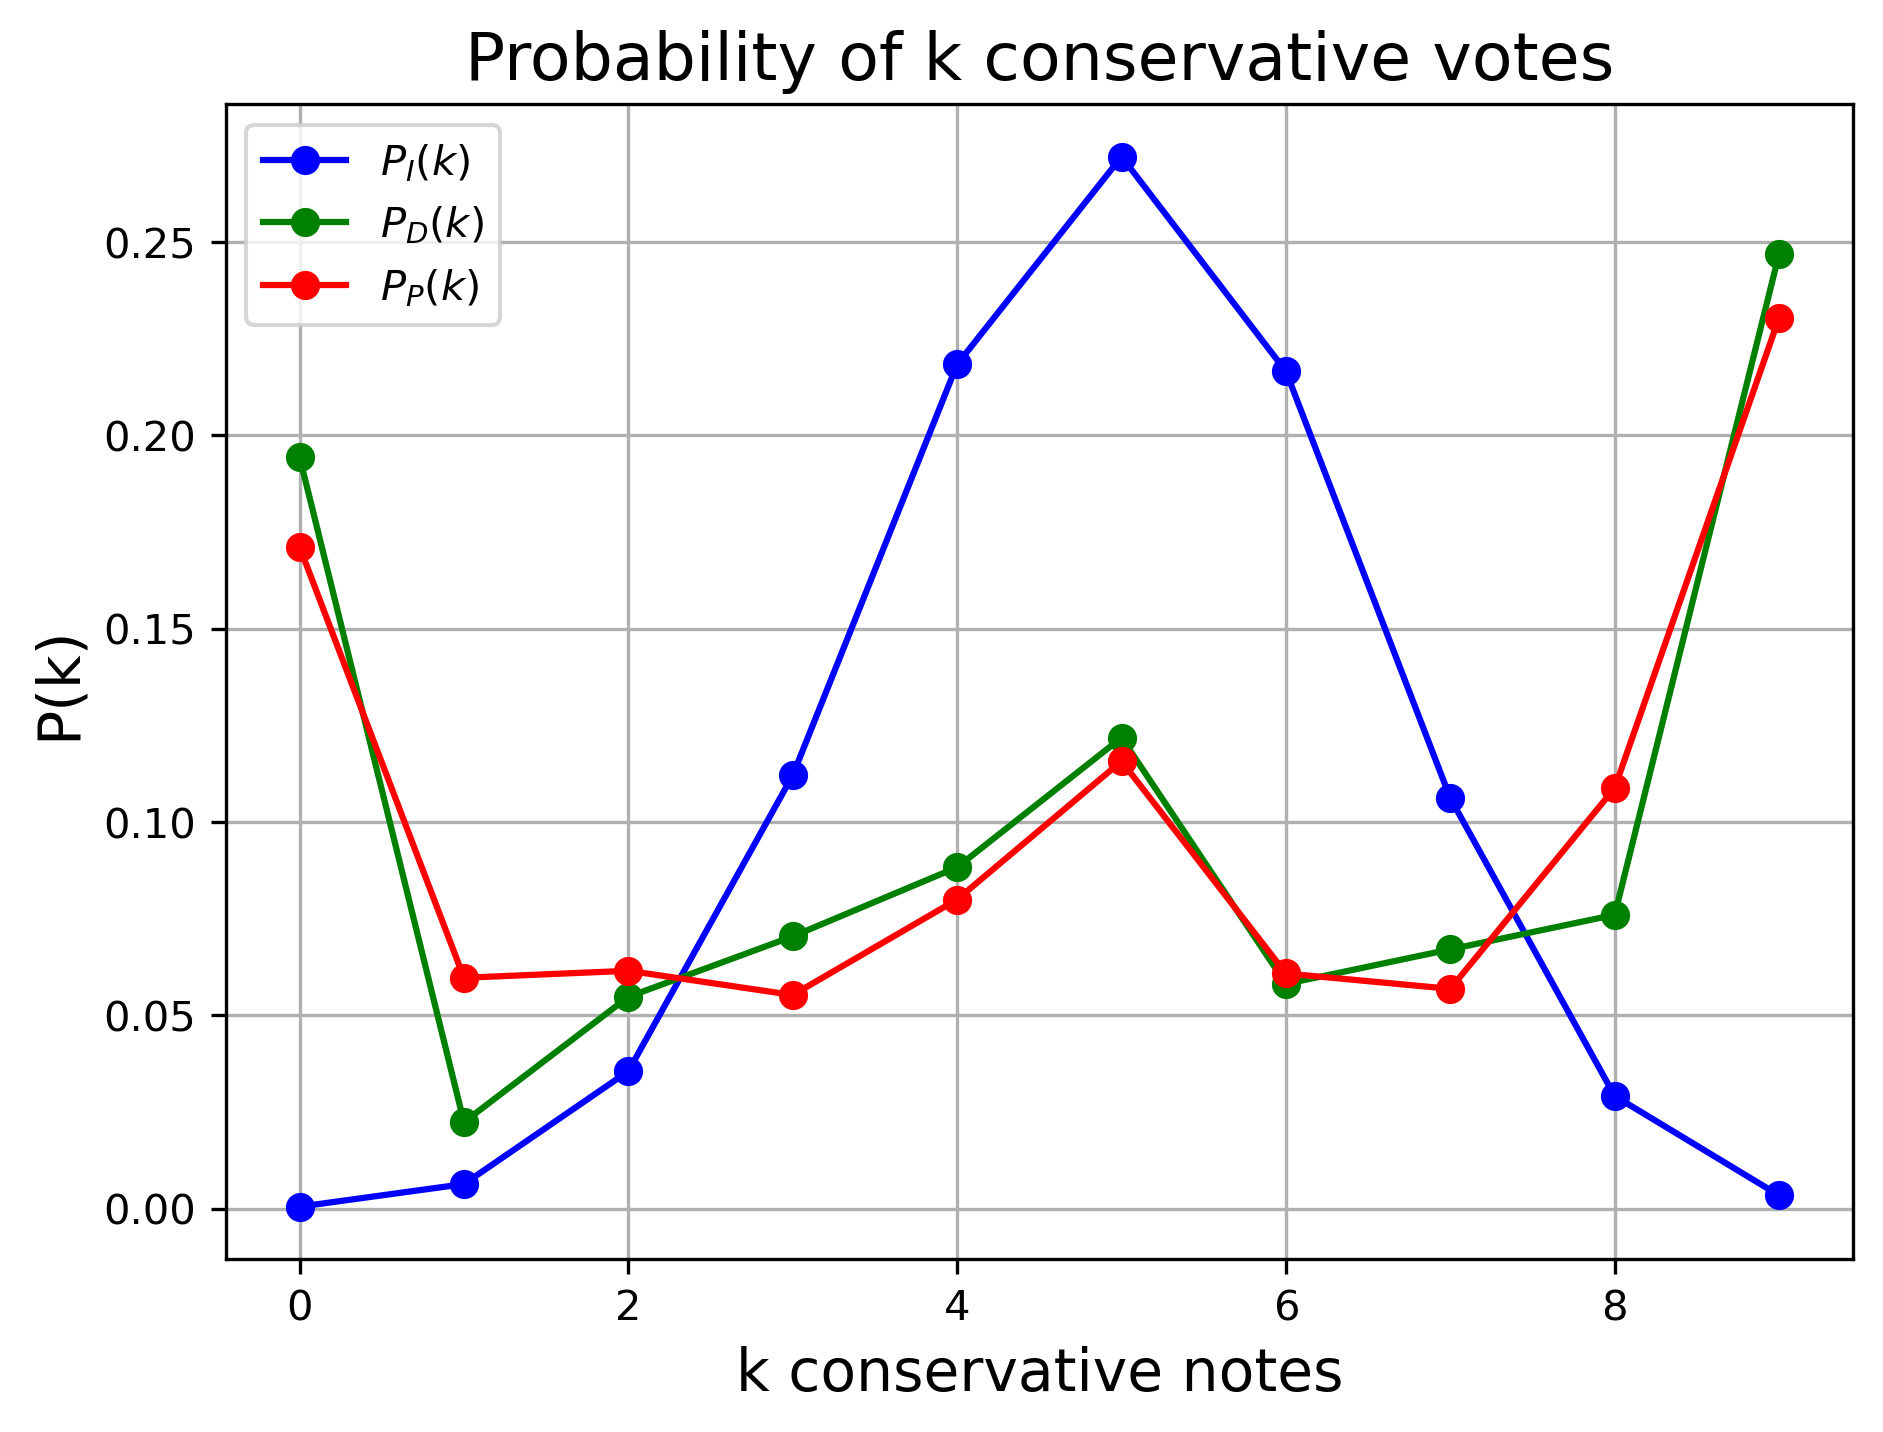

In [10]:
P_ising = [Q3.calculate_voting_prob_from_ising_model(h_vec, J_mat, k) for k in range(n+1)]
plt.figure(figsize=(7, 5), dpi=300)
plot_line(P, label=fr"$P_I(k)$")
plot_line(P_data, color="green", label=fr"$P_D(k)$")
plot_line(P_ising, color="r", label=fr"$P_P(k)$")
plt.savefig("figure/Q6_9")